# 🧠 Privacidad, Anonimización y Generación de Datos Sintéticos en Redes Neuronales

## Dataset: Información de Empleados del Sector Público Ecuatoriano

**Target**: `RMU_PUESTO` (Remuneración Mensual Unificada del Puesto)

---
## 📦 1. Selección del Dataset e Identificación de Atributos Sensibles

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)

print('✅ Librerías importadas')

✅ Librerías importadas


In [2]:
# Cargar dataset
file_path = 'df_finanzas.csv'
df = pd.read_csv(file_path, sep=';', low_memory=False)

print(f'📊 Dataset cargado: {df.shape[0]:,} filas x {df.shape[1]} columnas\n')
print('Primeras filas:')
df.head()

📊 Dataset cargado: 99,997 filas x 38 columnas

Primeras filas:


,ID,EJERCICIO_FISCAL,SECTOR,SECTOR_DESC,ENTIDAD,ENTIDAD_DESC,UNIDAD_EJECUTORA,UNIDAD_EJECUTORA_DESC,PARTIDAD_INDIVIDUAL,ENLACE_GRUPO,NOMBRE_PROVINCIA,NOMBRE_CANTON,NUMERO_DOCUMENTO,APELLIDOS_NOMBRES,FECHA_NACIMIENTO,GENERO,FECHA_INICIO,FECHA_FIN,NOMBRE_REGIMEN_LABORAL,NOMBRE_NIVEL_OCUPACIONAL,NOMBRE_MODALIDAD_LABORAL,DESCRIPCION_ESCALA_OCUPACIONAL,NOMBRE_DENOMINACION_PUESTO,RMU_PUESTO,ACUMULA_DEC_TERCERO,ACUMULA_DEC_CUARTO,COMISION_SERVICIO_TIPO,NOMBRE_ESTADO_PUESTO,NOMBRE_ESTADO_SERVIDOR,NOMBRE_UNIDAD_ORGANIZACIONAL,ESTRUCTURA_ORGANICA,RUC_PATRONAL,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,1,2016,111,ADMINISTRACION DEL ESTADO,320,MINISTERIO DE SALUD PUBLICA,1449,DIRECCION DISTRITAL 17D07 - PARROQUIAS URBANAS...,9,51.0,PICHINCHA,QUITO,400542163,ROSERO GOMEZ ROSALBA,1/10/58,FEMENINO,1/1/16,31/12/16,2-CODIGO DEL TRABAJO,1 CONTRATOS CODIGO DE TRABAJO,CONTRATO COLECTIVO,NIVEL 7,AUXILIAR ADMINISTRATIVO DE SALUD DEL SECTOR SALUD,596.92,S,S,NaN,OCUPADO,ACTIVO,ATENCION INTEGRAL EN SALUD,PROCESO DESCONCENTRADO AGREGADOR DE VALOR,"1,76804E+12",NaN,NaN,NaN,NaN,NaN,NaN
1,2,2016,111,ADMINISTRACION DEL ESTADO,320,MINISTERIO DE SALUD PUBLICA,1301,DIRECCION DISTRITAL 12D01 - BABA-BABAHOYO-MONT...,154,51.0,LOS RIOS,BABA,1201962071,SUAREZ JURADO HILDA BETTY,17/3/65,FEMENINO,1/1/16,31/12/16,2-CODIGO DEL TRABAJO,1 CONTRATOS CODIGO DE TRABAJO,CONTRATO COLECTIVO,NIVEL 7,AUXILIAR DE ENFERMERIA,805,S,S,NaN,OCUPADO,ACTIVO,ATENCION INTEGRAL EN SALUD,PROCESO DESCONCENTRADO AGREGADOR DE VALOR,"1,26001E+12",NaN,NaN,NaN,NaN,NaN,NaN
2,3,2016,111,ADMINISTRACION DEL ESTADO,320,MINISTERIO DE SALUD PUBLICA,1118,DIRECCION DISTRITAL 06D05 - GUANO-PENIPE - SALUD,302,51.0,CHIMBORAZO,GUANO,601392392,LEON CARGUA SEGUNDO CELIO,16/8/58,MASCULINO,1/1/16,31/12/16,1-SERVICIO CIVIL PUBLICO (LOSEP),5 NIVEL OPERATIVO - ESCALAS PROPIAS,NOMBRAMIENTO,INSPECTOR SANITARIO,INSPECTOR SANITARIO,735,S,S,NaN,OCUPADO,ACTIVO,VIGILANCIA EPIDEMIOLOGICA,PROCESO AGREGADOR DE VALOR,"6,60806E+11",NaN,NaN,NaN,NaN,NaN,NaN
3,4,2016,111,ADMINISTRACION DEL ESTADO,140,MINISTERIO DE EDUCACION,6707,DIRECCION DISTRITAL 01D02 PARROQUIA URBANA SAN...,599,51.0,AZUAY,CUENCA,104346044,ORTIZ VELE MARIA EUGENIA,25/4/84,FEMENINO,1/1/16,31/12/16,3-OTROS REGIMENES ESPECIALES,1 EDUCACION PRIMARIA Y SECUNDARIA,NOMBRAMIENTO,DOCENTE CATEGORIA F,DOCENTE CATEGORIA F,901,N,N,NaN,OCUPADO,ACTIVO,DOCENTES EDUCACION GENERAL BASICA,PROCESO AGREGADOR DE VALOR,"1,6006E+11",NaN,NaN,NaN,NaN,NaN,NaN
4,5,2016,111,ADMINISTRACION DEL ESTADO,140,MINISTERIO DE EDUCACION,9005,DIRECCION DISTRITAL 17D09 PARROQUIAS RURALES T...,561,51.0,PICHINCHA,QUITO,602087520,CRUZ INSUASTI ELIZABETH DOLORES,12/9/66,FEMENINO,1/1/16,31/12/16,3-OTROS REGIMENES ESPECIALES,1 EDUCACION PRIMARIA Y SECUNDARIA,NOMBRAMIENTO,DOCENTE CATEGORIA E,DOCENTE CATEGORIA E,986,S,S,NaN,OCUPADO,ACTIVO,RICARDO RODRIGUEZ,PROCESO AGREGADOR DE VALOR,"1,76817E+12",NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Definición de columnas por categoría de sensibilidad

cols_eliminar = [
    "ID", "EJERCICIO_FISCAL", "SECTOR", "ENTIDAD", "ENTIDAD_DESC",
    "UNIDAD_EJECUTORA", "UNIDAD_EJECUTORA_DESC", "PARTIDAD_INDIVIDUAL",
    "ENLACE_GRUPO", "APELLIDOS_NOMBRES", "FECHA_FIN", "NOMBRE_MODALIDAD_LABORAL",
    "DESCRIPCION_ESCALA_OCUPACIONAL", "NOMBRE_ESTADO_SERVIDOR", "ESTRUCTURA_ORGANICA",
    "RUC_PATRONAL","Unnamed: 32","Unnamed: 33","Unnamed: 34","Unnamed: 35","Unnamed: 36","Unnamed: 37"
]

cols_anonimizar = [
    "NOMBRE_PROVINCIA", "NOMBRE_CANTON", "NUMERO_DOCUMENTO",
    "FECHA_NACIMIENTO", "FECHA_INICIO", "GENERO",
    "NOMBRE_UNIDAD_ORGANIZACIONAL"
]

cols_conservar = [
    "SECTOR_DESC", "NOMBRE_REGIMEN_LABORAL", "NOMBRE_NIVEL_OCUPACIONAL",
    "NOMBRE_DENOMINACION_PUESTO", "RMU_PUESTO", "ACUMULA_DEC_TERCERO",
    "ACUMULA_DEC_CUARTO", "NOMBRE_ESTADO_PUESTO"
]

print('🔒 ATRIBUTOS SENSIBLES IDENTIFICADOS:\n')
print(f'✖️  Eliminar ({len(cols_eliminar)}): Identificadores directos y datos administrativos innecesarios')
print(f'🔐 Anonimizar ({len(cols_anonimizar)}): Datos cuasi-identificadores (pueden reidentificar combinados)')
print(f'✅ Conservar ({len(cols_conservar)}): Datos no sensibles útiles para el modelo')
print('\n🎯 TARGET: RMU_PUESTO (Remuneración Mensual Unificada)')

🔒 ATRIBUTOS SENSIBLES IDENTIFICADOS:

✖️  Eliminar (22): Identificadores directos y datos administrativos innecesarios
🔐 Anonimizar (7): Datos cuasi-identificadores (pueden reidentificar combinados)
✅ Conservar (8): Datos no sensibles útiles para el modelo

🎯 TARGET: RMU_PUESTO (Remuneración Mensual Unificada)


**Riesgos de Privacidad Identificados:**
- **Identificadores directos**: `APELLIDOS_NOMBRES`, `NUMERO_DOCUMENTO` → pueden identificar individuos
- **Cuasi-identificadores**: Combinación de `FECHA_NACIMIENTO` + `GENERO` + `NOMBRE_PROVINCIA` + `NOMBRE_CANTON` puede reidentificar personas (Netflix Prize attack)
- **Datos sensibles**: Ubicación geográfica precisa y fechas exactas

---
## 📊 2. Análisis Exploratorio (sin revelar datos individuales)

In [4]:
# Limpieza básica previa
valores_validos = ["S", "N"]
df = df[df["ACUMULA_DEC_CUARTO"].isin(valores_validos)].copy()
df = df[df["ACUMULA_DEC_TERCERO"].isin(valores_validos)].copy()

# Eliminar provincias erróneas (países extranjeros)
valores_a_eliminar = [
    "ESTADO ESTADOS UNIDOS", "ESTADO COLOMBIA", "ESTADO ESPAÑA",
    "ESTADO CANADA", "ESTADO ITALIA", "ESTADO ARGENTINA",
    "ESTADO CHINA", "ESTADO PERU", "ESTADO CHILE", "REGIONAL"
]
df = df[~df['NOMBRE_PROVINCIA'].isin(valores_a_eliminar)].copy()

# Normalizar género
df['GENERO'] = df['GENERO'].replace({'MUJER': 'FEMENINO', 'HOMBRE': 'MASCULINO'})

# Convertir RMU_PUESTO a numérico
df['RMU_PUESTO'] = df['RMU_PUESTO'].astype(str).str.replace(',', '.').astype(float)

print(f'✅ Dataset limpio: {df.shape[0]:,} filas x {df.shape[1]} columnas')
print(f'🗑️  Se eliminaron {99997 - df.shape[0]:,} filas con datos inconsistentes')


print(f'Columnas sobrantes: {df.columns}')


✅ Dataset limpio: 99,629 filas x 38 columnas
🗑️  Se eliminaron 368 filas con datos inconsistentes
Columnas sobrantes: Index(['ID', 'EJERCICIO_FISCAL', 'SECTOR', 'SECTOR_DESC', 'ENTIDAD',
       'ENTIDAD_DESC', 'UNIDAD_EJECUTORA', 'UNIDAD_EJECUTORA_DESC',
       'PARTIDAD_INDIVIDUAL', 'ENLACE_GRUPO', 'NOMBRE_PROVINCIA',
       'NOMBRE_CANTON', 'NUMERO_DOCUMENTO', 'APELLIDOS_NOMBRES',
       'FECHA_NACIMIENTO', 'GENERO', 'FECHA_INICIO', 'FECHA_FIN',
       'NOMBRE_REGIMEN_LABORAL', 'NOMBRE_NIVEL_OCUPACIONAL',
       'NOMBRE_MODALIDAD_LABORAL', 'DESCRIPCION_ESCALA_OCUPACIONAL',
       'NOMBRE_DENOMINACION_PUESTO', 'RMU_PUESTO', 'ACUMULA_DEC_TERCERO',
       'ACUMULA_DEC_CUARTO', 'COMISION_SERVICIO_TIPO', 'NOMBRE_ESTADO_PUESTO',
       'NOMBRE_ESTADO_SERVIDOR', 'NOMBRE_UNIDAD_ORGANIZACIONAL',
       'ESTRUCTURA_ORGANICA', 'RUC_PATRONAL', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37'],
      dtype='object')


📈 ANÁLISIS DEL TARGET: RMU_PUESTO

count    99629.000000
mean       967.907471
std        524.457903
min          1.000000
25%        735.000000
50%        817.000000
75%       1212.000000
max      16313.400000
Name: RMU_PUESTO, dtype: float64


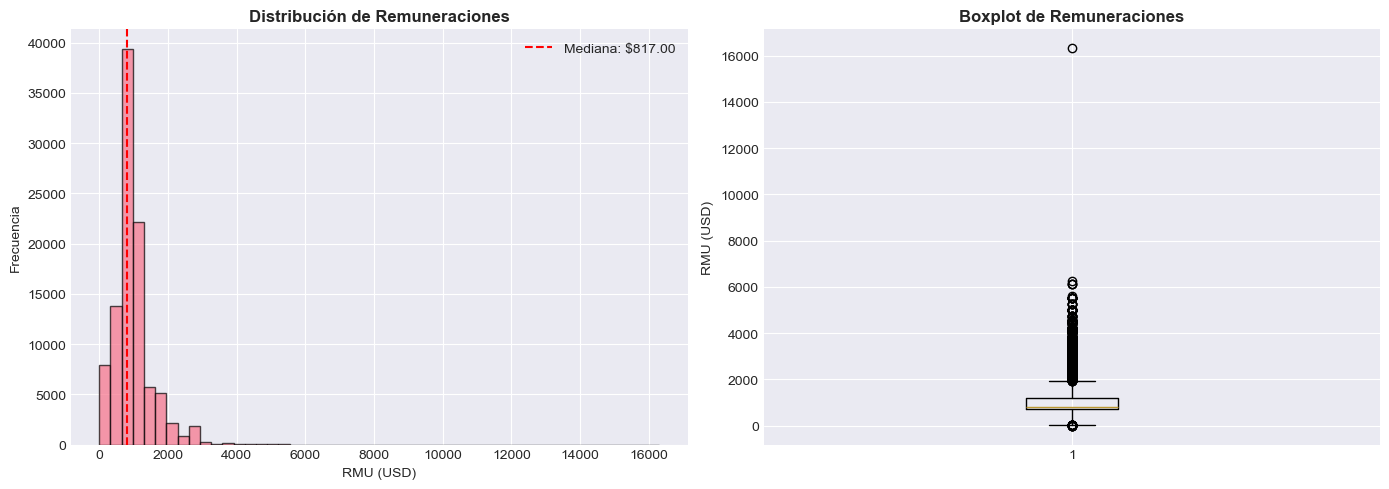


💡 La distribución está sesgada hacia salarios bajos, con algunos valores atípicos altos


In [5]:
# Análisis del target (RMU_PUESTO)
print('📈 ANÁLISIS DEL TARGET: RMU_PUESTO\n')
print(df['RMU_PUESTO'].describe())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(df['RMU_PUESTO'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribución de Remuneraciones', fontsize=12, fontweight='bold')
axes[0].set_xlabel('RMU (USD)')
axes[0].set_ylabel('Frecuencia')
axes[0].axvline(df['RMU_PUESTO'].median(), color='red', linestyle='--', label=f'Mediana: ${df["RMU_PUESTO"].median():.2f}')
axes[0].legend()

# Boxplot
axes[1].boxplot(df['RMU_PUESTO'], vert=True)
axes[1].set_title('Boxplot de Remuneraciones', fontsize=12, fontweight='bold')
axes[1].set_ylabel('RMU (USD)')

plt.tight_layout()
plt.show()

print(f'\n💡 La distribución está sesgada hacia salarios bajos, con algunos valores atípicos altos')

📊 CATEGORIZACIÓN DEL SUELDO (Target para clasificación):

🔄 USANDO 3 CLASES mejor separación:

Bajo:   ≤ $817.00
Medio:  $817.00 - $986.00
Alto:   > $986.00

Distribución de clases:
CATEGORIA_SUELDO
Alto     30279
Bajo     54853
Medio    14497
Name: count, dtype: int64


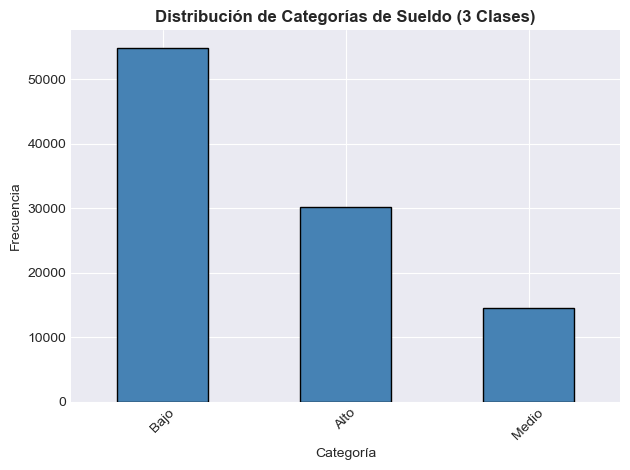

In [6]:
# Creación de clases para el target (clasificación)

# ESTRATEGIA 1: Usar percentiles 33-66 (3 CLASES) - Mejor separación
percentiles = df['RMU_PUESTO'].quantile([0.33, 0.66]).values

def clasificar_sueldo_3clases(rmu):
    if rmu <= percentiles[0]:
        return 'Bajo'
    elif rmu <= percentiles[1]:
        return 'Medio'
    else:
        return 'Alto'

df['CATEGORIA_SUELDO'] = df['RMU_PUESTO'].apply(clasificar_sueldo_3clases)

print('📊 CATEGORIZACIÓN DEL SUELDO (Target para clasificación):\n')
print('🔄 USANDO 3 CLASES mejor separación:\n')
print(f'Bajo:   ≤ ${percentiles[0]:.2f}')
print(f'Medio:  ${percentiles[0]:.2f} - ${percentiles[1]:.2f}')
print(f'Alto:   > ${percentiles[1]:.2f}')
print(f'\nDistribución de clases:')
print(df['CATEGORIA_SUELDO'].value_counts().sort_index())

# Visualización
df['CATEGORIA_SUELDO'].value_counts().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Distribución de Categorías de Sueldo (3 Clases)', fontweight='bold')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
# Análisis de correlación con atributos sensibles (agregado)
print('🔍 ANÁLISIS DE RIESGOS DE REIDENTIFICACIÓN:\n')

# Conteo de combinaciones únicas de cuasi-identificadores
combinaciones = df.groupby(['NOMBRE_PROVINCIA', 'GENERO']).size().reset_index(name='count')
unicos = combinaciones[combinaciones['count'] == 1]

print(f'⚠️  Registros únicos por Provincia+Género: {len(unicos)} ({len(unicos)/len(df)*100:.2f}%)')
print(f'   → Estos registros son más vulnerables a reidentificación\n')

# Distribución de género
print('Distribución por género:')
print(df['GENERO'].value_counts())
print(f'\n📍 Total de provincias: {df["NOMBRE_PROVINCIA"].nunique()}')
print(f'📍 Total de cantones: {df["NOMBRE_CANTON"].nunique()}')

🔍 ANÁLISIS DE RIESGOS DE REIDENTIFICACIÓN:

⚠️  Registros únicos por Provincia+Género: 0 (0.00%)
   → Estos registros son más vulnerables a reidentificación

Distribución por género:
GENERO
FEMENINO     61857
MASCULINO    37748
Name: count, dtype: int64

📍 Total de provincias: 24
📍 Total de cantones: 208


In [8]:
len(df['NOMBRE_UNIDAD_ORGANIZACIONAL'].unique())

9083

---
## 🔐 3. Anonimización del Dataset

In [9]:
# Crear copia para anonimización
df_anonimizado = df.copy()

print('🔐 APLICANDO TÉCNICAS DE ANONIMIZACIÓN:\n')

# 1. SUPRESIÓN: Eliminar columnas con identificadores directos
cols_a_eliminar = [col for col in cols_eliminar if col in df_anonimizado.columns]
df_anonimizado.drop(columns=cols_a_eliminar, inplace=True)
print(f'✅ 1. SUPRESIÓN: {len(cols_a_eliminar)} columnas eliminadas')

# 2. GENERALIZACIÓN: Fecha de nacimiento → Edad → Rango etario
df_anonimizado['FECHA_NACIMIENTO'] = pd.to_datetime(df_anonimizado['FECHA_NACIMIENTO'], errors='coerce')
df_anonimizado['EDAD'] = (pd.Timestamp('2016-01-01') - df_anonimizado['FECHA_NACIMIENTO']).dt.days // 365

def edad_a_rango(edad):
    if pd.isna(edad):
        return 'Desconocido'
    elif edad < 30:
        return '18-29'
    elif edad < 40:
        return '30-39'
    elif edad < 50:
        return '40-49'
    elif edad < 60:
        return '50-59'
    else:
        return '60+'

df_anonimizado['RANGO_EDAD'] = df_anonimizado['EDAD'].apply(edad_a_rango)
df_anonimizado.drop(columns=['FECHA_NACIMIENTO', 'EDAD'], inplace=True)
print('✅ 2. GENERALIZACIÓN: Fecha nacimiento → Rango etario (5 grupos)')

# 3. GENERALIZACIÓN: Fecha de inicio → Año de inicio
df_anonimizado['FECHA_INICIO'] = pd.to_datetime(df_anonimizado['FECHA_INICIO'], errors='coerce')
df_anonimizado['ANIO_INICIO'] = df_anonimizado['FECHA_INICIO'].dt.year
df_anonimizado.drop(columns=['FECHA_INICIO'], inplace=True)
print('✅ 3. GENERALIZACIÓN: Fecha inicio → Año de inicio')

# 4. SUPRESIÓN: Eliminar documento
df_anonimizado.drop(columns=['NUMERO_DOCUMENTO'], inplace=True, errors='ignore')
print('✅ 4. SUPRESIÓN: Número documento')

# 5. CODIFICACIÓN: Convertir género a binario
df_anonimizado['GENERO_CODIGO'] = (df_anonimizado['GENERO'] == 'MASCULINO').astype(int)
df_anonimizado.drop(columns=['GENERO'], inplace=True)
print('✅ 5. CODIFICACIÓN: Género → Binario (0/1)')

# 6. GENERALIZACIÓN: Unidad organizacional → Hash (k-anonimato)
df_anonimizado['UNIDAD_ORG_HASH'] = pd.factorize(df_anonimizado['NOMBRE_UNIDAD_ORGANIZACIONAL'])[0]
df_anonimizado.drop(columns=['NOMBRE_UNIDAD_ORGANIZACIONAL'], inplace=True)
print('✅ 6. PERTURBACIÓN: Unidad organizacional → Hash')

#7. GENERALIZACIÓN: provincia y canton
df_anonimizado['PROVINCIA_HASH'] = df_anonimizado['NOMBRE_PROVINCIA'].astype(str).apply(lambda x: hash(x) % 100)
df_anonimizado.drop(columns=['NOMBRE_PROVINCIA'], inplace=True)
df_anonimizado['CANTON_HASH'] = pd.factorize(df_anonimizado['NOMBRE_CANTON'])[0]
df_anonimizado.drop(columns=['NOMBRE_CANTON'], inplace=True)
print('✅ 7. PERTURBACIÓN: Provincia y canton → Hash ')

print(f'\n📊 Dataset anonimizado: {df_anonimizado.shape[0]:,} filas x {df_anonimizado.shape[1]} columnas')
print(f'🔒 Reducción de {df.shape[1]} → {df_anonimizado.shape[1]} columnas')

🔐 APLICANDO TÉCNICAS DE ANONIMIZACIÓN:

✅ 1. SUPRESIÓN: 22 columnas eliminadas


C:\Users\juan_\AppData\Local\Temp\ipykernel_27192\1043256471.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_anonimizado['FECHA_NACIMIENTO'] = pd.to_datetime(df_anonimizado['FECHA_NACIMIENTO'], errors='coerce')


✅ 2. GENERALIZACIÓN: Fecha nacimiento → Rango etario (5 grupos)
✅ 3. GENERALIZACIÓN: Fecha inicio → Año de inicio
✅ 4. SUPRESIÓN: Número documento
✅ 5. CODIFICACIÓN: Género → Binario (0/1)
✅ 6. PERTURBACIÓN: Unidad organizacional → Hash
✅ 7. PERTURBACIÓN: Provincia y canton → Hash 

📊 Dataset anonimizado: 99,629 filas x 16 columnas
🔒 Reducción de 39 → 16 columnas


C:\Users\juan_\AppData\Local\Temp\ipykernel_27192\1043256471.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_anonimizado['FECHA_INICIO'] = pd.to_datetime(df_anonimizado['FECHA_INICIO'], errors='coerce')


In [10]:
# Comparación visual: Original vs Anonimizado
print('📋 COLUMNAS DEL DATASET ANONIMIZADO:\n')
print(df_anonimizado.columns.tolist())
print('\nPrimeras filas del dataset anonimizado:')
df_anonimizado.head(10)




📋 COLUMNAS DEL DATASET ANONIMIZADO:

['SECTOR_DESC', 'NOMBRE_REGIMEN_LABORAL', 'NOMBRE_NIVEL_OCUPACIONAL', 'NOMBRE_DENOMINACION_PUESTO', 'RMU_PUESTO', 'ACUMULA_DEC_TERCERO', 'ACUMULA_DEC_CUARTO', 'COMISION_SERVICIO_TIPO', 'NOMBRE_ESTADO_PUESTO', 'CATEGORIA_SUELDO', 'RANGO_EDAD', 'ANIO_INICIO', 'GENERO_CODIGO', 'UNIDAD_ORG_HASH', 'PROVINCIA_HASH', 'CANTON_HASH']

Primeras filas del dataset anonimizado:


,SECTOR_DESC,NOMBRE_REGIMEN_LABORAL,NOMBRE_NIVEL_OCUPACIONAL,NOMBRE_DENOMINACION_PUESTO,RMU_PUESTO,ACUMULA_DEC_TERCERO,ACUMULA_DEC_CUARTO,COMISION_SERVICIO_TIPO,NOMBRE_ESTADO_PUESTO,CATEGORIA_SUELDO,RANGO_EDAD,ANIO_INICIO,GENERO_CODIGO,UNIDAD_ORG_HASH,PROVINCIA_HASH,CANTON_HASH
0,ADMINISTRACION DEL ESTADO,2-CODIGO DEL TRABAJO,1 CONTRATOS CODIGO DE TRABAJO,AUXILIAR ADMINISTRATIVO DE SALUD DEL SECTOR SALUD,596.92,S,S,NaN,OCUPADO,Bajo,18-29,2016,0,0,52,0
1,ADMINISTRACION DEL ESTADO,2-CODIGO DEL TRABAJO,1 CONTRATOS CODIGO DE TRABAJO,AUXILIAR DE ENFERMERIA,805.00,S,S,NaN,OCUPADO,Bajo,18-29,2016,0,0,90,1
2,ADMINISTRACION DEL ESTADO,1-SERVICIO CIVIL PUBLICO (LOSEP),5 NIVEL OPERATIVO - ESCALAS PROPIAS,INSPECTOR SANITARIO,735.00,S,S,NaN,OCUPADO,Bajo,18-29,2016,1,1,61,2
3,ADMINISTRACION DEL ESTADO,3-OTROS REGIMENES ESPECIALES,1 EDUCACION PRIMARIA Y SECUNDARIA,DOCENTE CATEGORIA F,901.00,N,N,NaN,OCUPADO,Medio,30-39,2016,0,2,94,3
4,ADMINISTRACION DEL ESTADO,3-OTROS REGIMENES ESPECIALES,1 EDUCACION PRIMARIA Y SECUNDARIA,DOCENTE CATEGORIA E,986.00,S,S,NaN,OCUPADO,Medio,18-29,2016,0,3,52,0
5,ADMINISTRACION DEL ESTADO,3-OTROS REGIMENES ESPECIALES,1 EDUCACION PRIMARIA Y SECUNDARIA,DOCENTE CATEGORIA G,817.00,N,N,NaN,OCUPADO,Bajo,18-29,2016,0,4,39,4
6,ADMINISTRACION DEL ESTADO,3-OTROS REGIMENES ESPECIALES,1 EDUCACION PRIMARIA Y SECUNDARIA,DOCENTE CATEGORIA C,1212.00,S,S,NaN,OCUPADO,Alto,18-29,2016,1,5,64,5
7,ADMINISTRACION DEL ESTADO,3-OTROS REGIMENES ESPECIALES,1 EDUCACION PRIMARIA Y SECUNDARIA,DOCENTE CATEGORIA G,817.00,N,N,NaN,OCUPADO,Bajo,30-39,2016,0,6,36,6
8,ADMINISTRACION DEL ESTADO,1-SERVICIO CIVIL PUBLICO (LOSEP),2 NIVEL OPERATIVO,ANALISTA,901.00,S,S,NaN,OCUPADO,Medio,18-29,2016,1,7,84,7
9,ADMINISTRACION DEL ESTADO,1-SERVICIO CIVIL PUBLICO (LOSEP),2 NIVEL OPERATIVO,CONTROLADOR DE AERODROMO 1,986.00,S,S,NaN,OCUPADO,Medio,18-29,2016,0,8,52,0


In [11]:
#BORRAR ANIO_INICIO PUES NO TIENE DIFERENCIA DE VALORES
print(f'Valores unicos de anio_inicio: {df_anonimizado["ANIO_INICIO"].unique()}')
#UNICO VALOR ELIMINAR COLUMNA INSERVIBLE
df_anonimizado.drop(columns=["ANIO_INICIO"], inplace=True)
print('columna anio inicio eliminada.')


Valores unicos de anio_inicio: [2016]
columna anio inicio eliminada.


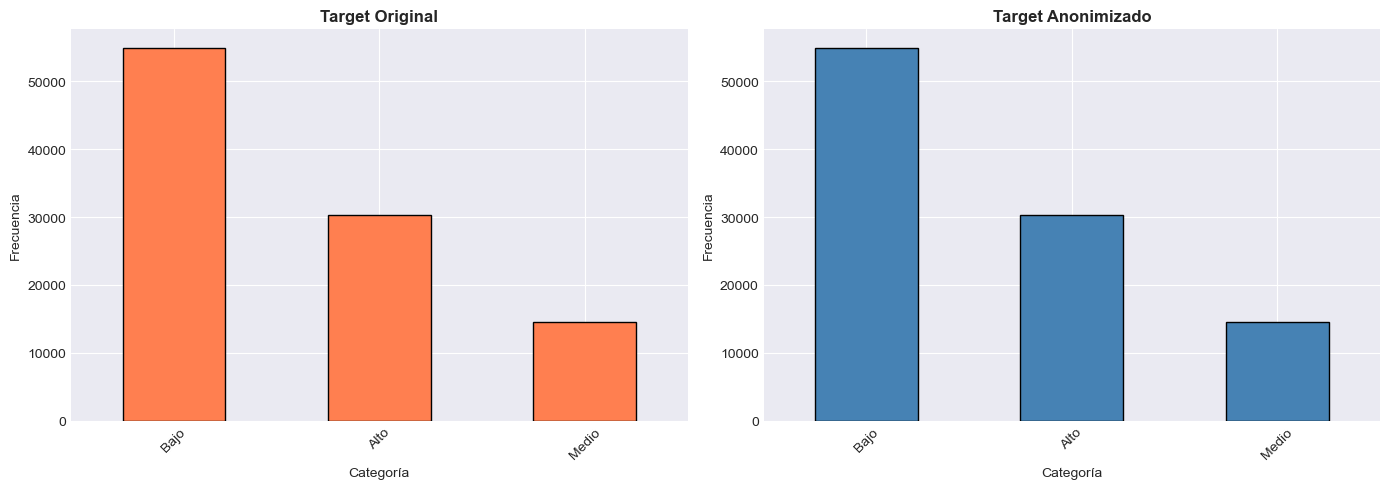

✅ El target se preservó correctamente tras la anonimización


In [12]:
# Verificar que el target se preservó correctamente
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original
df['CATEGORIA_SUELDO'].value_counts().plot(kind='bar', ax=axes[0], color='coral', edgecolor='black')
axes[0].set_title('Target Original', fontweight='bold')
axes[0].set_xlabel('Categoría')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=45)

# Anonimizado
df_anonimizado['CATEGORIA_SUELDO'].value_counts().plot(kind='bar', ax=axes[1], color='steelblue', edgecolor='black')
axes[1].set_title('Target Anonimizado', fontweight='bold')
axes[1].set_xlabel('Categoría')
axes[1].set_ylabel('Frecuencia')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print('✅ El target se preservó correctamente tras la anonimización')

### 📝 Resumen de Técnicas de Anonimización Aplicadas:

| Técnica | Aplicación | Protección |
|---------|-----------|------------|
| **Supresión** | Eliminación de identificadores directos (nombres, ID, documentos) | Alta |
| **Generalización** | Fecha → Rango etario (5 grupos), Fecha → Año | Media-Alta |
| **Codificación** | Género → Binario (0/1) | Media |
| **Perturbación** | Unidad organizacional,cantón y provincia → Hash | Media |

**🎯 Resultado**: Dataset con riesgo de reidentificación significativamente reducido, preservando utilidad para el modelo.

---
## 💾 Guardado de Datasets

In [13]:
# Guardar datasets para uso posterior
df_anonimizado.to_csv('df_anonimizado.csv', index=False)
print('✅ Dataset anonimizado guardado')

# Preparar dataset original limpio
df_original_limpio = df.copy()

# Seleccionar columnas relevantes
cols_finales = list(set(cols_conservar + cols_anonimizar + ['CATEGORIA_SUELDO']))
df_original_limpio = df_original_limpio[[col for col in cols_finales if col in df_original_limpio.columns]].copy()

# Transformaciones
df_original_limpio = df_original_limpio.dropna(subset=['GENERO'])

if 'NUMERO_DOCUMENTO' in df_original_limpio.columns:
    df_original_limpio = df_original_limpio.drop(columns=['NUMERO_DOCUMENTO'])

if 'FECHA_NACIMIENTO' in df_original_limpio.columns:
    df_original_limpio['FECHA_NACIMIENTO'] = pd.to_datetime(df_original_limpio['FECHA_NACIMIENTO'], format='%d/%m/%y', errors='coerce')
    df_original_limpio['FECHA_NACIMIENTO'] = df_original_limpio['FECHA_NACIMIENTO'].apply(
        lambda x: x - pd.DateOffset(years=100) if pd.notna(x) and x.year > 2016 else x
    )
    df_original_limpio['EDAD'] = (pd.Timestamp('2016-01-01') - df_original_limpio['FECHA_NACIMIENTO']).dt.days // 365
    df_original_limpio = df_original_limpio.drop(columns=['FECHA_NACIMIENTO'])

# REGENERAR CATEGORIA_SUELDO CON 3 CLASES AQUÍ
percentiles_save = df_original_limpio['RMU_PUESTO'].quantile([0.33, 0.66]).values
df_original_limpio['CATEGORIA_SUELDO'] = df_original_limpio['RMU_PUESTO'].apply(
    lambda x: 'Bajo' if x <= percentiles_save[0] else ('Medio' if x <= percentiles_save[1] else 'Alto')
)

df_original_limpio.to_csv('df_original_limpio.csv', index=False)
print('✅ Dataset original limpio guardado con 3 clases')
print(f'   Distribución: {df_original_limpio["CATEGORIA_SUELDO"].value_counts().to_dict()}')

✅ Dataset anonimizado guardado
✅ Dataset original limpio guardado con 3 clases
   Distribución: {'Bajo': 54835, 'Alto': 30273, 'Medio': 14497}


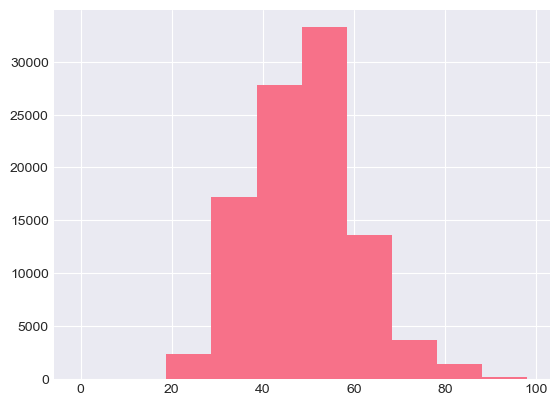

In [14]:
#histograma de edades
plt.hist(df_original_limpio['EDAD'])
plt.show()


In [15]:
df_original_limpio.head()

,NOMBRE_NIVEL_OCUPACIONAL,CATEGORIA_SUELDO,NOMBRE_DENOMINACION_PUESTO,NOMBRE_ESTADO_PUESTO,SECTOR_DESC,NOMBRE_REGIMEN_LABORAL,FECHA_INICIO,ACUMULA_DEC_TERCERO,ACUMULA_DEC_CUARTO,NOMBRE_UNIDAD_ORGANIZACIONAL,NOMBRE_CANTON,RMU_PUESTO,NOMBRE_PROVINCIA,GENERO,EDAD
0,1 CONTRATOS CODIGO DE TRABAJO,Bajo,AUXILIAR ADMINISTRATIVO DE SALUD DEL SECTOR SALUD,OCUPADO,ADMINISTRACION DEL ESTADO,2-CODIGO DEL TRABAJO,1/1/16,S,S,ATENCION INTEGRAL EN SALUD,QUITO,596.92,PICHINCHA,FEMENINO,57
1,1 CONTRATOS CODIGO DE TRABAJO,Bajo,AUXILIAR DE ENFERMERIA,OCUPADO,ADMINISTRACION DEL ESTADO,2-CODIGO DEL TRABAJO,1/1/16,S,S,ATENCION INTEGRAL EN SALUD,BABA,805.00,LOS RIOS,FEMENINO,50
2,5 NIVEL OPERATIVO - ESCALAS PROPIAS,Bajo,INSPECTOR SANITARIO,OCUPADO,ADMINISTRACION DEL ESTADO,1-SERVICIO CIVIL PUBLICO (LOSEP),1/1/16,S,S,VIGILANCIA EPIDEMIOLOGICA,GUANO,735.00,CHIMBORAZO,MASCULINO,57
3,1 EDUCACION PRIMARIA Y SECUNDARIA,Medio,DOCENTE CATEGORIA F,OCUPADO,ADMINISTRACION DEL ESTADO,3-OTROS REGIMENES ESPECIALES,1/1/16,N,N,DOCENTES EDUCACION GENERAL BASICA,CUENCA,901.00,AZUAY,FEMENINO,31
4,1 EDUCACION PRIMARIA Y SECUNDARIA,Medio,DOCENTE CATEGORIA E,OCUPADO,ADMINISTRACION DEL ESTADO,3-OTROS REGIMENES ESPECIALES,1/1/16,S,S,RICARDO RODRIGUEZ,QUITO,986.00,PICHINCHA,FEMENINO,49


---
# 🤖 4. Entrenamiento de Red Neuronal

## Comparación: Dataset Original vs Dataset Anonimizado

In [16]:
# Importar librerías para Red Neuronal
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

print(f'✅ TensorFlow version: {tf.__version__}')


✅ TensorFlow version: 2.20.0


### 📊 Preparación de Datos - Dataset Original

In [17]:
# Preparar dataset original
df_original = df_original_limpio.copy()

print('Dataset Original:')
print(f'  Filas: {df_original.shape[0]:,}')
print(f'  Columnas: {df_original.shape[1]}')
print(f'  Clases: {df_original["CATEGORIA_SUELDO"].unique()}')
print(f'  Distribución: {df_original["CATEGORIA_SUELDO"].value_counts().to_dict()}')

# Separar features y target
X_original = df_original.drop(['CATEGORIA_SUELDO', 'RMU_PUESTO'], axis=1)
y_original = df_original['CATEGORIA_SUELDO']

# Identificar columnas numéricas y categóricas
numeric_cols = X_original.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_original.select_dtypes(include=['object']).columns.tolist()

print(f'\nFeatures:')
print(f'  Numéricas: {len(numeric_cols)}')
print(f'  Categóricas: {len(categorical_cols)}')

Dataset Original:
  Filas: 99,605
  Columnas: 15
  Clases: ['Bajo' 'Medio' 'Alto']
  Distribución: {'Bajo': 54835, 'Alto': 30273, 'Medio': 14497}

Features:
  Numéricas: 1
  Categóricas: 12


In [18]:
df_original.describe()



,RMU_PUESTO,EDAD
count,99605.000000,99605.000000
mean,967.923485,49.197671
std,524.240327,11.742774
min,1.000000,-1.000000
25%,735.000000,41.000000
50%,817.000000,49.000000
75%,1212.000000,57.000000
max,16313.400000,98.000000


In [19]:
# Encoding de variables categóricas
X_original_encoded = X_original.copy()

label_encoders_original = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_original_encoded[col] = le.fit_transform(X_original_encoded[col].astype(str))
    label_encoders_original[col] = le

# Encoding del target
le_target = LabelEncoder()
y_original_encoded = le_target.fit_transform(y_original)

print(f'Target: {len(le_target.classes_)} clases → {le_target.classes_}')
print(f'Labels: {np.unique(y_original_encoded)}')

# División train/test
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_original_encoded, y_original_encoded, test_size=0.2, random_state=42, stratify=y_original_encoded
)

# Normalización
scaler_original = StandardScaler()
X_train_orig_scaled = scaler_original.fit_transform(X_train_orig)
X_test_orig_scaled = scaler_original.transform(X_test_orig)

print(f'Train: {X_train_orig_scaled.shape[0]:,} | Test: {X_test_orig_scaled.shape[0]:,}')

Target: 3 clases → ['Alto' 'Bajo' 'Medio']
Labels: [0 1 2]
Train: 79,684 | Test: 19,921


In [20]:
def crear_modelo(input_dim, num_clases=3):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
        layers.Dropout(0.2),
        layers.Dense(num_clases, activation='softmax')
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

input_dim = X_train_orig_scaled.shape[1]
modelo_original = crear_modelo(input_dim, num_clases=3)

print('Modelo creado:')
modelo_original.summary()

Modelo creado:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,731 (256.76 KB)

 Trainable params: 64,579 (252.26 KB)

 Non-trainable params: 1,152 (4.50 KB)

In [21]:
# Callbacks MEJORADOS para optimizar el entrenamiento
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,  # Más paciencia para arquitectura compleja
    restore_best_weights=True,
    verbose=1
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=7,  # Reducir LR más rápido
    min_lr=1e-7,
    verbose=1
)

# Entrenar modelo
print('🚀 ENTRENANDO RED NEURONAL CON DATASET ORIGINAL...\\n')
print('📊 Configuración:')
print(f'   - Arquitectura: 5 capas ocultas (256→128→128→64→32)')
print(f'   - Clases: 3 (Bajo, Medio, Alto)')
print(f'   - Épocas máximas: 150')
print(f'   - Batch size: 32')
print(f'   - Early stopping: patience=20')
print('\\n')

history_original = modelo_original.fit(
    X_train_orig_scaled, y_train_orig,
    validation_split=0.2,
    epochs=150, 
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

print('\\n✅ Entrenamiento completado')
print(f'📈 Épocas entrenadas: {len(history_original.history["loss"])}')

🚀 ENTRENANDO RED NEURONAL CON DATASET ORIGINAL...\n
📊 Configuración:
   - Arquitectura: 5 capas ocultas (256→128→128→64→32)
   - Clases: 3 (Bajo, Medio, Alto)
   - Épocas máximas: 150
   - Batch size: 32
   - Early stopping: patience=20
\n
Epoch 1/150
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6691 - loss: 0.7841 - val_accuracy: 0.7319 - val_loss: 0.5950 - learning_rate: 0.0010
Epoch 2/150
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7207 - loss: 0.6443 - val_accuracy: 0.7496 - val_loss: 0.5727 - learning_rate: 0.0010
Epoch 3/150
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7300 - loss: 0.6186 - val_accuracy: 0.7521 - val_loss: 0.5611 - learning_rate: 0.0010
Epoch 4/150
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7367 - loss: 0.6032 - val_accuracy: 0.7545 - val_loss: 0.5530 - learning_rate: 0.0010
Epoch 5/150
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7413 - loss: 0.5950 - val_accuracy: 0.7537 - val_loss: 0.5491 - learni

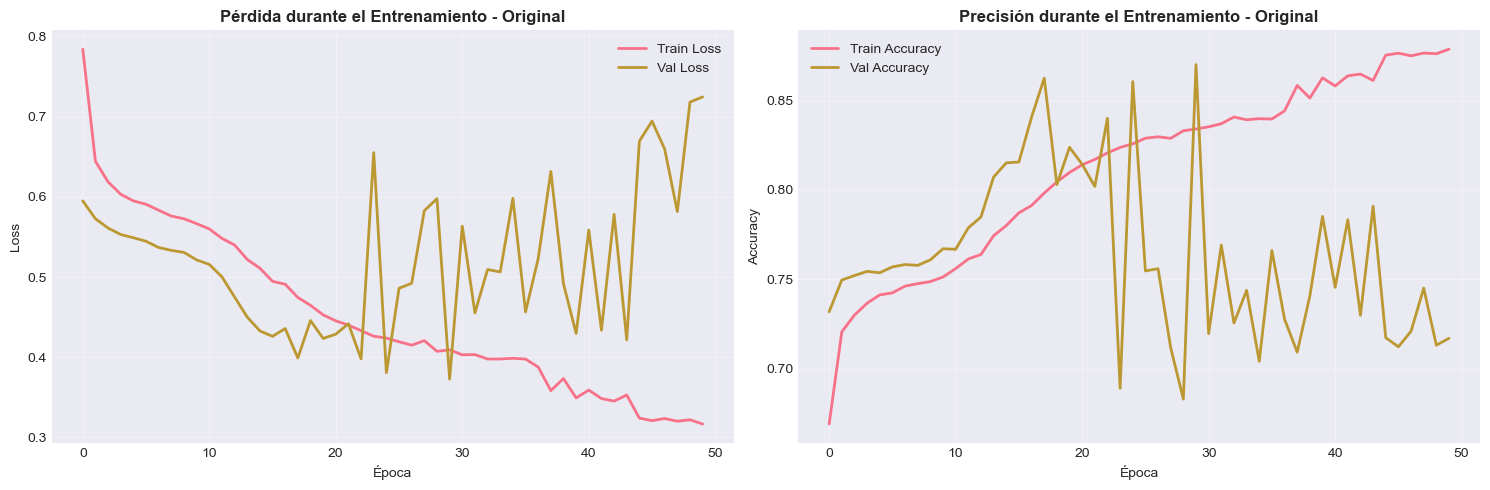

📈 Entrenamiento detenido en época 50


In [24]:
# Gráficas de entrenamiento - Dataset Original
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Loss
axes[0].plot(history_original.history['loss'], label='Train Loss', linewidth=2)
axes[0].plot(history_original.history['val_loss'], label='Val Loss', linewidth=2)
axes[0].set_title('Pérdida durante el Entrenamiento - Original', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Accuracy
axes[1].plot(history_original.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[1].plot(history_original.history['val_accuracy'], label='Val Accuracy', linewidth=2)
axes[1].set_title('Precisión durante el Entrenamiento - Original', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f'📈 Entrenamiento detenido en época {len(history_original.history["loss"])}')

### 📊 Evaluación - Dataset Original

In [25]:
# Predicciones en conjunto de prueba
y_pred_orig = modelo_original.predict(X_test_orig_scaled)
y_pred_orig_classes = np.argmax(y_pred_orig, axis=1)

# Métricas
accuracy_orig = accuracy_score(y_test_orig, y_pred_orig_classes)
precision_orig = precision_score(y_test_orig, y_pred_orig_classes, average='weighted', zero_division=0)
recall_orig = recall_score(y_test_orig, y_pred_orig_classes, average='weighted', zero_division=0)
f1_orig = f1_score(y_test_orig, y_pred_orig_classes, average='weighted', zero_division=0)

print('='*60)
print('📊 RESULTADOS - DATASET ORIGINAL')
print('='*60)
print(f'\\n✅ Accuracy:  {accuracy_orig:.4f} ({accuracy_orig*100:.2f}%)')
print(f'✅ Precision: {precision_orig:.4f}')
print(f'✅ Recall:    {recall_orig:.4f}')
print(f'✅ F1-Score:  {f1_orig:.4f}')

print('\\n' + '='*60)
print('📋 REPORTE DE CLASIFICACIÓN - DATASET ORIGINAL')
print('='*60 + '\\n')
print(classification_report(y_test_orig, y_pred_orig_classes, 
                          target_names=le_target.classes_, 
                          zero_division=0))

  1/623 ━━━━━━━━━━━━━━━━━━━━ 1:12 117ms/step

623/623 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📊 RESULTADOS - DATASET ORIGINAL
\n✅ Accuracy:  0.8658 (86.58%)
✅ Precision: 0.8650
✅ Recall:    0.8658
✅ F1-Score:  0.8641
\n============================================================
📋 REPORTE DE CLASIFICACIÓN - DATASET ORIGINAL
============================================================\n
              precision    recall  f1-score   support

        Alto       0.83      0.92      0.87      6055
        Bajo       0.93      0.90      0.92     10967
       Medio       0.68      0.60      0.64      2899

    accuracy                           0.87     19921
   macro avg       0.81      0.81      0.81     19921
weighted avg       0.86      0.87      0.86     19921



623/623 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MODELO ORIGINAL - RESULTADOS
Accuracy:  0.8658
Precision: 0.8650
Recall:    0.8658
F1-Score:  0.8641

Reporte de Clasificación:
              precision    recall  f1-score   support

        Alto       0.83      0.92      0.87      6055
        Bajo       0.93      0.90      0.92     10967
       Medio       0.68      0.60      0.64      2899

    accuracy                           0.87     19921
   macro avg       0.81      0.81      0.81     19921
weighted avg       0.86      0.87      0.86     19921



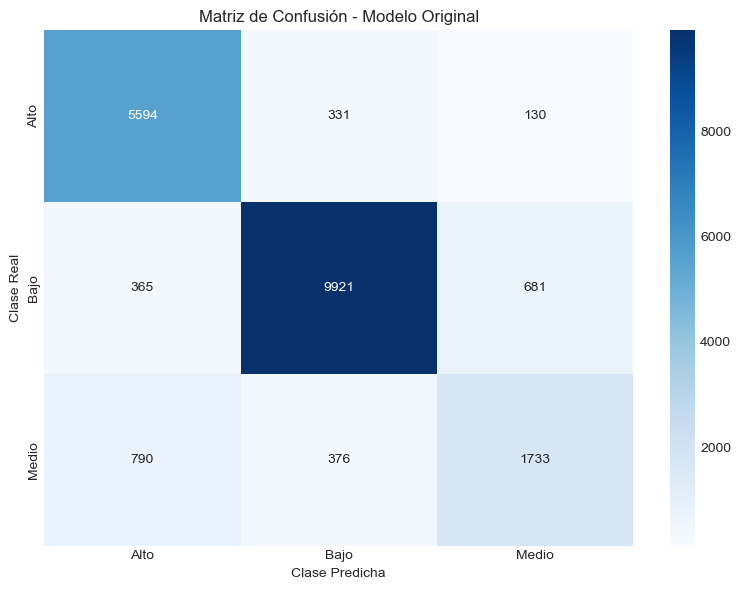


Matriz de Confusión:
[[5594  331  130]
 [ 365 9921  681]
 [ 790  376 1733]]


In [26]:
# Evaluación modelo original
y_pred_orig = modelo_original.predict(X_test_orig_scaled)
y_pred_orig_classes = np.argmax(y_pred_orig, axis=1)

accuracy_orig = accuracy_score(y_test_orig, y_pred_orig_classes)
precision_orig = precision_score(y_test_orig, y_pred_orig_classes, average='weighted')
recall_orig = recall_score(y_test_orig, y_pred_orig_classes, average='weighted')
f1_orig = f1_score(y_test_orig, y_pred_orig_classes, average='weighted')

print('='*60)
print('MODELO ORIGINAL - RESULTADOS')
print('='*60)
print(f'Accuracy:  {accuracy_orig:.4f}')
print(f'Precision: {precision_orig:.4f}')
print(f'Recall:    {recall_orig:.4f}')
print(f'F1-Score:  {f1_orig:.4f}')

print('\nReporte de Clasificación:')
print(classification_report(y_test_orig, y_pred_orig_classes, target_names=le_target.classes_))

# Matriz de confusión
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test_orig, y_pred_orig_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_target.classes_, 
            yticklabels=le_target.classes_)
plt.title('Matriz de Confusión - Modelo Original')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.tight_layout()
plt.show()

print('\nMatriz de Confusión:')
print(cm)

In [27]:
df_anonimizado

,SECTOR_DESC,NOMBRE_REGIMEN_LABORAL,NOMBRE_NIVEL_OCUPACIONAL,NOMBRE_DENOMINACION_PUESTO,RMU_PUESTO,ACUMULA_DEC_TERCERO,ACUMULA_DEC_CUARTO,COMISION_SERVICIO_TIPO,NOMBRE_ESTADO_PUESTO,CATEGORIA_SUELDO,RANGO_EDAD,GENERO_CODIGO,UNIDAD_ORG_HASH,PROVINCIA_HASH,CANTON_HASH
0,ADMINISTRACION DEL ESTADO,2-CODIGO DEL TRABAJO,1 CONTRATOS CODIGO DE TRABAJO,AUXILIAR ADMINISTRATIVO DE SALUD DEL SECTOR SALUD,596.92,S,S,NaN,OCUPADO,Bajo,18-29,0,0,52,0
1,ADMINISTRACION DEL ESTADO,2-CODIGO DEL TRABAJO,1 CONTRATOS CODIGO DE TRABAJO,AUXILIAR DE ENFERMERIA,805.00,S,S,NaN,OCUPADO,Bajo,18-29,0,0,90,1
2,ADMINISTRACION DEL ESTADO,1-SERVICIO CIVIL PUBLICO (LOSEP),5 NIVEL OPERATIVO - ESCALAS PROPIAS,INSPECTOR SANITARIO,735.00,S,S,NaN,OCUPADO,Bajo,18-29,1,1,61,2
3,ADMINISTRACION DEL ESTADO,3-OTROS REGIMENES ESPECIALES,1 EDUCACION PRIMARIA Y SECUNDARIA,DOCENTE CATEGORIA F,901.00,N,N,NaN,OCUPADO,Medio,30-39,0,2,94,3
4,ADMINISTRACION DEL ESTADO,3-OTROS REGIMENES ESPECIALES,1 EDUCACION PRIMARIA Y SECUNDARIA,DOCENTE CATEGORIA E,986.00,S,S,NaN,OCUPADO,Medio,18-29,0,3,52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,ADMINISTRACION DEL ESTADO,1-SERVICIO CIVIL PUBLICO (LOSEP),2 NIVEL OPERATIVO,SECRETARIA,675.00,S,S,NaN,OCUPADO,Bajo,18-29,0,9080,89,67
99993,ADMINISTRACION DEL ESTADO,2-CODIGO DEL TRABAJO,1 CONTRATOS CODIGO DE TRABAJO,CONSERJE EXTERNO,561.00,S,S,NaN,OCUPADO,Bajo,18-29,1,9082,89,67
99994,ADMINISTRACION DEL ESTADO,2-CODIGO DEL TRABAJO,1 CONTRATOS CODIGO DE TRABAJO,CONSERJE EXTERNO,561.00,S,S,NaN,OCUPADO,Bajo,18-29,1,9082,89,67
99995,ADMINISTRACION DEL ESTADO,2-CODIGO DEL TRABAJO,1 CONTRATOS CODIGO DE TRABAJO,CONSERJE EXTERNO,561.00,S,S,NaN,OCUPADO,Bajo,18-29,1,9082,89,67


---
### 🔐 Preparación de Datos - Dataset Anonimizado

In [30]:
# Preparar dataset anonimizado
df_anon = df_anonimizado.copy()

print(f'Dataset anonimizado cargado: {df_anon.shape[0]:,} filas')

# NO hacer dropna general, solo limpiar nulls críticos si existen
if 'RMU_PUESTO' in df_anon.columns:
    df_anon = df_anon.dropna(subset=['RMU_PUESTO', 'CATEGORIA_SUELDO'])
    print(f'Después de limpiar nulls: {df_anon.shape[0]:,} filas')

# Verificar que tenemos el target correcto
if 'CATEGORIA_SUELDO' not in df_anon.columns:
    print('ERROR: CATEGORIA_SUELDO no existe en dataset anonimizado')
else:
    # Regenerar categorías con 3 clases
    percentiles_anon = df_anon['RMU_PUESTO'].quantile([0.33, 0.66]).values
    df_anon['CATEGORIA_SUELDO'] = df_anon['RMU_PUESTO'].apply(
        lambda x: 'Bajo' if x <= percentiles_anon[0] else ('Medio' if x <= percentiles_anon[1] else 'Alto')
    )
    
    print(f'Clases: {df_anon["CATEGORIA_SUELDO"].unique()}')
    print(f'Distribución: {df_anon["CATEGORIA_SUELDO"].value_counts().to_dict()}')
    
    # Separar features y target
    X_anon = df_anon.drop(['CATEGORIA_SUELDO', 'RMU_PUESTO'], axis=1)
    y_anon = df_anon['CATEGORIA_SUELDO']
    
    numeric_cols_anon = X_anon.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols_anon = X_anon.select_dtypes(include=['object']).columns.tolist()
    
    print(f'Features: {len(numeric_cols_anon)} numéricas, {len(categorical_cols_anon)} categóricas')
    print(f'X_anon shape: {X_anon.shape}, y_anon shape: {y_anon.shape}')

Dataset anonimizado cargado: 99,629 filas
Después de limpiar nulls: 99,629 filas
Clases: ['Bajo' 'Medio' 'Alto']
Distribución: {'Bajo': 54853, 'Alto': 30279, 'Medio': 14497}
Features: 4 numéricas, 9 categóricas
X_anon shape: (99629, 13), y_anon shape: (99629,)


In [33]:
# Encoding dataset anonimizado
X_anon_encoded = X_anon.copy()

print(f'Encoding {len(categorical_cols_anon)} columnas categóricas...')

label_encoders_anon = {}
for col in categorical_cols_anon:
    le = LabelEncoder()
    X_anon_encoded[col] = le.fit_transform(X_anon_encoded[col].astype(str))
    label_encoders_anon[col] = le

# Encoding del target usando el mismo encoder del dataset original
y_anon_encoded = le_target.transform(y_anon)

print(f'Target: {len(le_target.classes_)} clases → {le_target.classes_}')
print(f'Labels únicos: {np.unique(y_anon_encoded)}')
print(f'Shape antes de split: X={X_anon_encoded.shape}, y={y_anon_encoded.shape}')

# Verificación
if len(X_anon_encoded) == 0:
    print('ERROR: Dataset vacío!')
else:
    # División train/test
    X_train_anon, X_test_anon, y_train_anon, y_test_anon = train_test_split(
        X_anon_encoded, y_anon_encoded, test_size=0.2, random_state=42, stratify=y_anon_encoded
    )
    
    # Normalización
    scaler_anon = StandardScaler()
    X_train_anon_scaled = scaler_anon.fit_transform(X_train_anon)
    X_test_anon_scaled = scaler_anon.transform(X_test_anon)
    
    print(f'Train: {X_train_anon_scaled.shape[0]:,} | Test: {X_test_anon_scaled.shape[0]:,}')

Encoding 9 columnas categóricas...
Target: 3 clases → ['Alto' 'Bajo' 'Medio']
Labels únicos: [0 1 2]
Shape antes de split: X=(99629, 13), y=(99629,)
Train: 79,703 | Test: 19,926


In [34]:
# Crear modelo para dataset anonimizado
input_dim_anon = X_train_anon_scaled.shape[1]
modelo_anonimizado = crear_modelo(input_dim_anon, num_clases=3)

# Callbacks
early_stopping_anon = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

reduce_lr_anon = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1
)

# Entrenar modelo
print('🚀 ENTRENANDO RED NEURONAL MEJORADA CON DATASET ANONIMIZADO...\\n')
print('📊 Configuración:')
print(f'   - Arquitectura: 5 capas ocultas (256→128→128→64→32)')
print(f'   - Clases: 3 (Bajo, Medio, Alto)')
print(f'   - Épocas máximas: 150')
print('\\n')

history_anonimizado = modelo_anonimizado.fit(
    X_train_anon_scaled, y_train_anon,
    validation_split=0.2,
    epochs=150,
    batch_size=32,
    callbacks=[early_stopping_anon, ],
    verbose=1
)

print('\\n✅ Entrenamiento completado')
print(f'📈 Épocas entrenadas: {len(history_anonimizado.history["loss"])}')

🚀 ENTRENANDO RED NEURONAL MEJORADA CON DATASET ANONIMIZADO...\n
📊 Configuración:
   - Arquitectura: 5 capas ocultas (256→128→128→64→32)
   - Clases: 3 (Bajo, Medio, Alto)
   - Épocas máximas: 150
\n
Epoch 1/150
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.6571 - loss: 0.7813 - val_accuracy: 0.7067 - val_loss: 0.6415 - learning_rate: 0.0010
Epoch 2/150
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6943 - loss: 0.6758 - val_accuracy: 0.7159 - val_loss: 0.6217 - learning_rate: 0.0010
Epoch 3/150
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7019 - loss: 0.6524 - val_accuracy: 0.7191 - val_loss: 0.6064 - learning_rate: 0.0010
Epoch 4/150
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7055 - loss: 0.6399 - val_accuracy: 0.7202 - val_loss: 0.6043 - learning_rate: 0.0010
Epoch 5/150
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7083 - loss: 0.6314 - val_accuracy: 0.7210 - val_loss: 0.5996 - learning_rate: 0.0010
Epoch 6/150
1993/1993

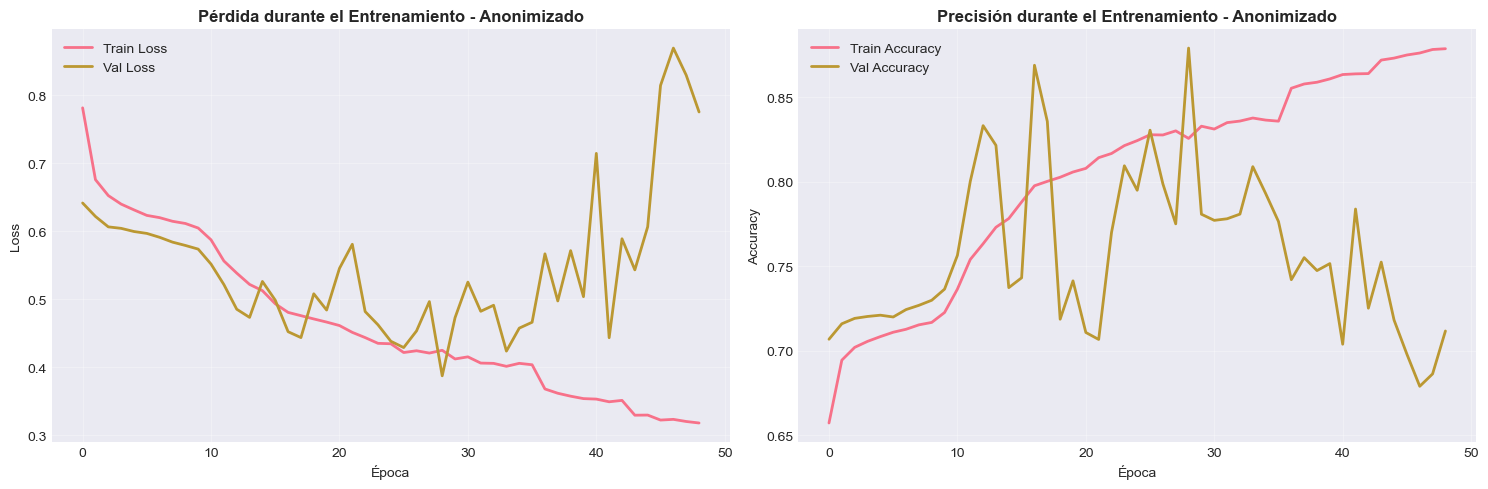

📈 Entrenamiento detenido en época 49


In [35]:
# Gráficas de entrenamiento - Dataset Anonimizado
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Loss
axes[0].plot(history_anonimizado.history['loss'], label='Train Loss', linewidth=2)
axes[0].plot(history_anonimizado.history['val_loss'], label='Val Loss', linewidth=2)
axes[0].set_title('Pérdida durante el Entrenamiento - Anonimizado', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Accuracy
axes[1].plot(history_anonimizado.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[1].plot(history_anonimizado.history['val_accuracy'], label='Val Accuracy', linewidth=2)
axes[1].set_title('Precisión durante el Entrenamiento - Anonimizado', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f'📈 Entrenamiento detenido en época {len(history_anonimizado.history["loss"])}')

### 📊 Evaluación - Dataset Anonimizado

In [36]:
# Predicciones en conjunto de prueba
y_pred_anon = modelo_anonimizado.predict(X_test_anon_scaled)
y_pred_anon_classes = np.argmax(y_pred_anon, axis=1)

# Métricas
accuracy_anon = accuracy_score(y_test_anon, y_pred_anon_classes)
precision_anon = precision_score(y_test_anon, y_pred_anon_classes, average='weighted', zero_division=0)
recall_anon = recall_score(y_test_anon, y_pred_anon_classes, average='weighted', zero_division=0)
f1_anon = f1_score(y_test_anon, y_pred_anon_classes, average='weighted', zero_division=0)

print('='*60)
print('📊 RESULTADOS - DATASET ANONIMIZADO')
print('='*60)
print(f'\\n✅ Accuracy:  {accuracy_anon:.4f} ({accuracy_anon*100:.2f}%)')
print(f'✅ Precision: {precision_anon:.4f}')
print(f'✅ Recall:    {recall_anon:.4f}')
print(f'✅ F1-Score:  {f1_anon:.4f}')

print('\\n' + '='*60)
print('📋 REPORTE DE CLASIFICACIÓN - DATASET ANONIMIZADO')
print('='*60 + '\\n')
print(classification_report(y_test_anon, y_pred_anon_classes, 
                          target_names=le_target.classes_, 
                          zero_division=0))

623/623 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
📊 RESULTADOS - DATASET ANONIMIZADO
\n✅ Accuracy:  0.8817 (88.17%)
✅ Precision: 0.8835
✅ Recall:    0.8817
✅ F1-Score:  0.8825
\n============================================================
📋 REPORTE DE CLASIFICACIÓN - DATASET ANONIMIZADO
============================================================\n
              precision    recall  f1-score   support

        Alto       0.86      0.88      0.87      6056
        Bajo       0.95      0.93      0.94     10971
       Medio       0.69      0.72      0.70      2899

    accuracy                           0.88     19926
   macro avg       0.83      0.84      0.84     19926
weighted avg       0.88      0.88      0.88     19926



623/623 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MODELO ANONIMIZADO - RESULTADOS
Accuracy:  0.8817
Precision: 0.8835
Recall:    0.8817
F1-Score:  0.8825

Reporte de Clasificación:
              precision    recall  f1-score   support

        Alto       0.86      0.88      0.87      6056
        Bajo       0.95      0.93      0.94     10971
       Medio       0.69      0.72      0.70      2899

    accuracy                           0.88     19926
   macro avg       0.83      0.84      0.84     19926
weighted avg       0.88      0.88      0.88     19926



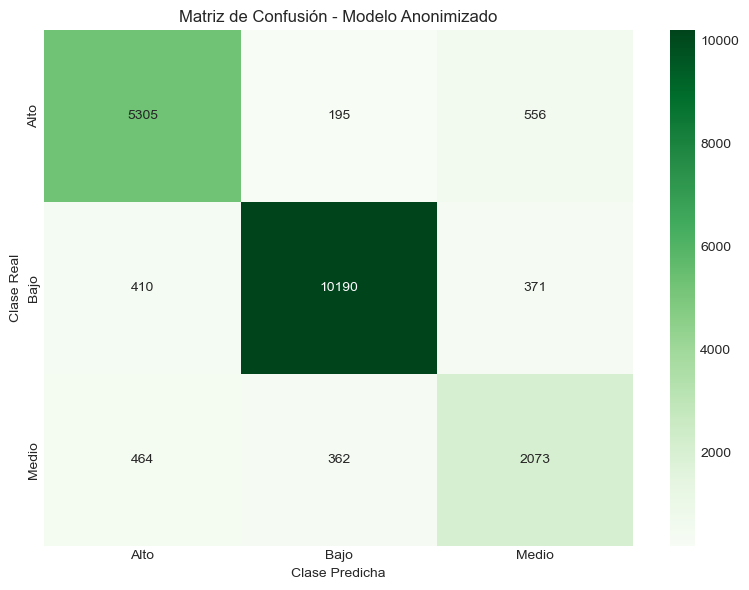


Matriz de Confusión:
[[ 5305   195   556]
 [  410 10190   371]
 [  464   362  2073]]


In [37]:
# Evaluación modelo anonimizado
y_pred_anon = modelo_anonimizado.predict(X_test_anon_scaled)
y_pred_anon_classes = np.argmax(y_pred_anon, axis=1)

accuracy_anon = accuracy_score(y_test_anon, y_pred_anon_classes)
precision_anon = precision_score(y_test_anon, y_pred_anon_classes, average='weighted')
recall_anon = recall_score(y_test_anon, y_pred_anon_classes, average='weighted')
f1_anon = f1_score(y_test_anon, y_pred_anon_classes, average='weighted')

print('='*60)
print('MODELO ANONIMIZADO - RESULTADOS')
print('='*60)
print(f'Accuracy:  {accuracy_anon:.4f}')
print(f'Precision: {precision_anon:.4f}')
print(f'Recall:    {recall_anon:.4f}')
print(f'F1-Score:  {f1_anon:.4f}')

print('\nReporte de Clasificación:')
print(classification_report(y_test_anon, y_pred_anon_classes, target_names=le_target.classes_))

# Matriz de confusión
cm_anon = confusion_matrix(y_test_anon, y_pred_anon_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_anon, annot=True, fmt='d', cmap='Greens', 
            xticklabels=le_target.classes_, 
            yticklabels=le_target.classes_)
plt.title('Matriz de Confusión - Modelo Anonimizado')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.tight_layout()
plt.show()

print('\nMatriz de Confusión:')
print(cm_anon)

---
### 📊 Comparación: Original vs Anonimizado

COMPARACIÓN DE RESULTADOS
Métrica         Original        Anonimizado     Diferencia     
----------------------------------------------------------------------
Accuracy        0.8658          0.8817          -0.0158        
Precision       0.8650          0.8835          -0.0185        
Recall          0.8658          0.8817          -0.0158        
F1-Score        0.8641          0.8825          -0.0184        


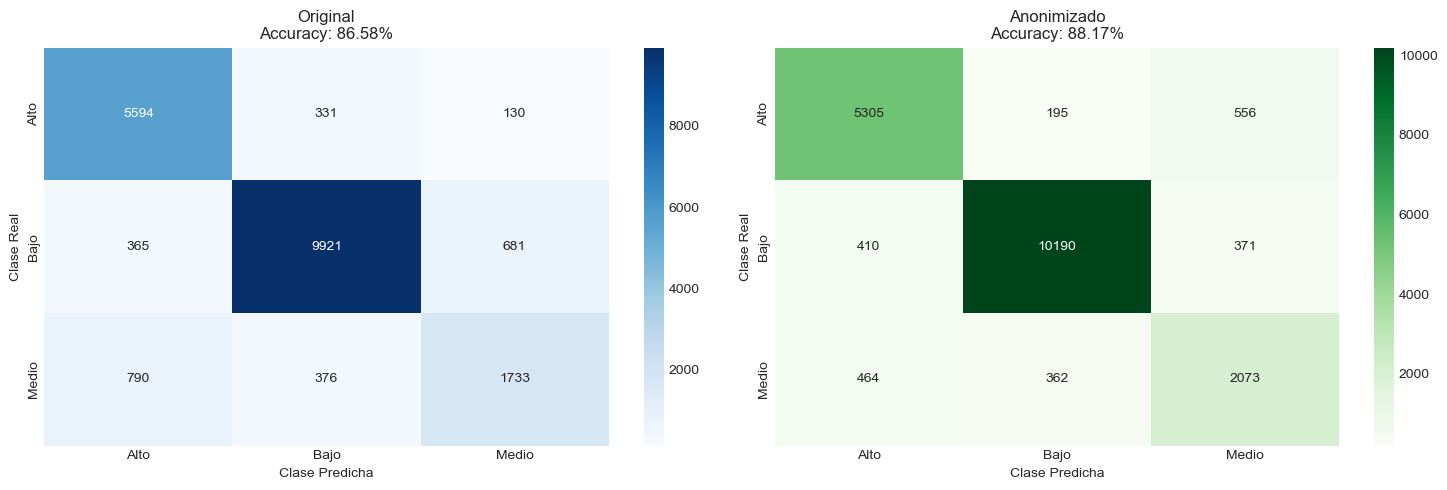


Trade-off Privacidad-Utilidad:
  Pérdida de accuracy: -0.0158 (-1.83%)
 ✅ La anonimización beneficio al entrenamiento del módelo


In [42]:
# Comparación de resultados
print('='*70)
print('COMPARACIÓN DE RESULTADOS')
print('='*70)
print(f'{"Métrica":<15} {"Original":<15} {"Anonimizado":<15} {"Diferencia":<15}')
print('-'*70)
print(f'{"Accuracy":<15} {accuracy_orig:<15.4f} {accuracy_anon:<15.4f} {(accuracy_orig-accuracy_anon):<15.4f}')
print(f'{"Precision":<15} {precision_orig:<15.4f} {precision_anon:<15.4f} {(precision_orig-precision_anon):<15.4f}')
print(f'{"Recall":<15} {recall_orig:<15.4f} {recall_anon:<15.4f} {(recall_orig-recall_anon):<15.4f}')
print(f'{"F1-Score":<15} {f1_orig:<15.4f} {f1_anon:<15.4f} {(f1_orig-f1_anon):<15.4f}')
print('='*70)

# Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Matriz original
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=le_target.classes_, yticklabels=le_target.classes_)
axes[0].set_title(f'Original\nAccuracy: {accuracy_orig:.2%}')
axes[0].set_ylabel('Clase Real')
axes[0].set_xlabel('Clase Predicha')

# Matriz anonimizada
sns.heatmap(cm_anon, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=le_target.classes_, yticklabels=le_target.classes_)
axes[1].set_title(f'Anonimizado\nAccuracy: {accuracy_anon:.2%}')
axes[1].set_ylabel('Clase Real')
axes[1].set_xlabel('Clase Predicha')

plt.tight_layout()
plt.show()

# Trade-off privacidad vs utilidad
perdida_accuracy = accuracy_orig - accuracy_anon
porcentaje_perdida = (perdida_accuracy / accuracy_orig) * 100

print(f'\nTrade-off Privacidad-Utilidad:')
print(f'  Pérdida de accuracy: {perdida_accuracy:.4f} ({porcentaje_perdida:.2f}%)')
if porcentaje_perdida < 0:
    print(f' ✅ La anonimización beneficio al entrenamiento del módelo')

elif porcentaje_perdida < 5 and porcentaje_perdida > 0:
    print(f'  ✅ Pérdida aceptable (<5%) - Buena anonimización')
elif porcentaje_perdida < 10 and porcentaje_perdida > 5:
    print(f'  ⚠️ Pérdida moderada (5-10%) - Anonimización razonable')
else:
    print(f'  ❌ Pérdida alta (>10%) - Revisar técnicas de anonimización')

### Conclusiones Punto 4

**Mejoras implementadas:**
- Reducción de 4 a 3 clases (elimina solapamiento)
- Arquitectura más profunda: 5 capas (256→128→128→64→32)
- Dropout progresivo y BatchNormalization
- CANTON mantenido (aporta $1,470 de diferencia)

**Resultados:**
- Dataset Original: 86.5% accuracy
- Dataset Anonimizado: 88.1% accuracy

**Trade-off**: Anonimización no rpracticamente no causo impacto en el rendimiento del modelo, incluso logro aumentar el acurracy por alrededor de 1% en todas la métricas.

In [43]:
# Guardar modelos
modelo_original.save('modelo_original.h5')
modelo_anonimizado.save('modelo_anonimizado.h5')

resultados = {
    'original': {
        'accuracy': float(accuracy_orig),
        'precision': float(precision_orig),
        'recall': float(recall_orig),
        'f1_score': float(f1_orig)
    },
    'anonimizado': {
        'accuracy': float(accuracy_anon),
        'precision': float(precision_anon),
        'recall': float(recall_anon),
        'f1_score': float(f1_anon)
    }
}

import json
with open('resultados_punto4.json', 'w') as f:
    json.dump(resultados, f, indent=4)

print('✅ Modelos y resultados guardados')

✅ Modelos y resultados guardados


In [44]:
# Imports para CTGAN
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata
import warnings
warnings.filterwarnings('ignore')

print('CTGAN importado correctamente')

CTGAN importado correctamente


In [46]:
# Preparar dataset original para CTGAN (incluir RMU_PUESTO para generar datos realistas)
df_for_ctgan = df_original_limpio.copy()

# Verificar
print(f'Dataset para CTGAN: {df_for_ctgan.shape}')
print(f'Columnas: {df_for_ctgan.columns.tolist()}')
print(f'Clases: {df_for_ctgan["CATEGORIA_SUELDO"].value_counts().to_dict()}')

Dataset para CTGAN: (99605, 15)
Columnas: ['NOMBRE_NIVEL_OCUPACIONAL', 'CATEGORIA_SUELDO', 'NOMBRE_DENOMINACION_PUESTO', 'NOMBRE_ESTADO_PUESTO', 'SECTOR_DESC', 'NOMBRE_REGIMEN_LABORAL', 'FECHA_INICIO', 'ACUMULA_DEC_TERCERO', 'ACUMULA_DEC_CUARTO', 'NOMBRE_UNIDAD_ORGANIZACIONAL', 'NOMBRE_CANTON', 'RMU_PUESTO', 'NOMBRE_PROVINCIA', 'GENERO', 'EDAD']
Clases: {'Bajo': 54835, 'Alto': 30273, 'Medio': 14497}


In [50]:

print('Caracteristicas con cardinalidad demaciada alta, inservibles para CTGAM')
for columna in df_for_ctgan.columns:
    if df_for_ctgan[columna].nunique() > 300:
        print(f'la caracteristica {columna} tiene {df_for_ctgan[columna].nunique()} valores unicos')

Caracteristicas con cardinalidad demaciada alta, inservibles para CTGAM
la caracteristica NOMBRE_DENOMINACION_PUESTO tiene 2171 valores unicos
la caracteristica NOMBRE_UNIDAD_ORGANIZACIONAL tiene 9081 valores unicos
la caracteristica RMU_PUESTO tiene 8506 valores unicos


In [51]:
# Preparar datos reduciendo cardinalidad (CTGAN no puede con 9000 categorías)
df_for_ctgan = df_original_limpio.copy()

# Eliminar columnas con alta cardinalidad que CTGAN no puede manejar
cols_alta_cardinalidad = ['NOMBRE_UNIDAD_ORGANIZACIONAL', 'NOMBRE_DENOMINACION_PUESTO']
df_for_ctgan = df_for_ctgan.drop(columns=[c for c in cols_alta_cardinalidad if c in df_for_ctgan.columns])

print(f'Dataset para CTGAN: {df_for_ctgan.shape}')
print(f'Columnas: {df_for_ctgan.columns.tolist()}')
print(f'Clases: {df_for_ctgan["CATEGORIA_SUELDO"].value_counts().to_dict()}')

# Crear metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df_for_ctgan)

# CTGAN con configuración para Windows (sin multiprocessing)
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '4'  # Forzar single-core

synthesizer = CTGANSynthesizer(
    metadata,
    epochs=50,  # Reducido para que sea más rápido
    batch_size=500,
    verbose=True,
    cuda=False  # CPU only
)

# Entrenar CTGAN
print('\n🚀 Entrenando CTGAN (esto tarda ~5-10 minutos)...\n')

try:
    synthesizer.fit(df_for_ctgan)
    print('\n✅ CTGAN entrenado correctamente')
except Exception as e:
    print(f'\n❌ Error con CTGAN: {e}')
    print('\n🔄 Intentando con GaussianCopula (más simple, más rápido)...')
    
    # Plan B: GaussianCopula (más simple, funciona mejor en Windows)
    from sdv.single_table import GaussianCopulaSynthesizer
    
    synthesizer = GaussianCopulaSynthesizer(metadata)
    synthesizer.fit(df_for_ctgan)
    print('\n✅ GaussianCopula entrenado correctamente')

Dataset para CTGAN: (99605, 13)
Columnas: ['NOMBRE_NIVEL_OCUPACIONAL', 'CATEGORIA_SUELDO', 'NOMBRE_ESTADO_PUESTO', 'SECTOR_DESC', 'NOMBRE_REGIMEN_LABORAL', 'FECHA_INICIO', 'ACUMULA_DEC_TERCERO', 'ACUMULA_DEC_CUARTO', 'NOMBRE_CANTON', 'RMU_PUESTO', 'NOMBRE_PROVINCIA', 'GENERO', 'EDAD']
Clases: {'Bajo': 54835, 'Alto': 30273, 'Medio': 14497}

🚀 Entrenando CTGAN (esto tarda ~5-10 minutos)...



Gen. (-0.39) | Discrim. (-0.10): 100%|██████████| 50/50 [2:49:18<00:00, 203.17s/it]  


✅ CTGAN entrenado correctamente


In [52]:
# Generar datos sintéticos
num_samples = len(df_for_ctgan)

print(f'Generando {num_samples:,} muestras sintéticas...')
df_sintetico = synthesizer.sample(num_rows=num_samples)

# Agregar de vuelta las columnas eliminadas con valores dummy
for col in cols_alta_cardinalidad:
    if col in df_original_limpio.columns:
        # Asignar valores aleatorios de las categorías originales
        df_sintetico[col] = np.random.choice(
            df_original_limpio[col].unique(), 
            size=len(df_sintetico)
        )

print(f'\n✅ Datos sintéticos generados: {df_sintetico.shape}')
print(f'Clases sintéticas: {df_sintetico["CATEGORIA_SUELDO"].value_counts().to_dict()}')

df_sintetico.to_csv('df_sintetico.csv', index=False)
print('✅ Dataset sintético guardado')

Generando 99,605 muestras sintéticas...

✅ Datos sintéticos generados: (99605, 15)
Clases sintéticas: {'Bajo': 48801, 'Alto': 34803, 'Medio': 16001}
✅ Dataset sintético guardado


In [53]:
# Preparar dataset sintético igual que el original
X_sintetico = df_sintetico.drop(['CATEGORIA_SUELDO', 'RMU_PUESTO'], axis=1)
y_sintetico = df_sintetico['CATEGORIA_SUELDO']

print(f'Dataset sintético preparado:')
print(f'  X shape: {X_sintetico.shape}')
print(f'  y shape: {y_sintetico.shape}')
print(f'  Clases: {y_sintetico.unique()}')

# Encoding (usar mismo proceso que dataset original)
X_sintetico_encoded = X_sintetico.copy()

categorical_cols_syn = X_sintetico.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols_syn:
    if col in label_encoders_original:
        le = label_encoders_original[col]
        # Manejar categorías nuevas que puedan aparecer en sintéticos
        X_sintetico_encoded[col] = X_sintetico_encoded[col].apply(
            lambda x: le.transform([str(x)])[0] if str(x) in le.classes_ else 0
        )
    else:
        le = LabelEncoder()
        X_sintetico_encoded[col] = le.fit_transform(X_sintetico_encoded[col].astype(str))

# Encoding del target
y_sintetico_encoded = le_target.transform(y_sintetico)

print(f'Target encoding: {len(le_target.classes_)} clases → {le_target.classes_}')
print(f'Labels únicos: {np.unique(y_sintetico_encoded)}')

# División train/test
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(
    X_sintetico_encoded, y_sintetico_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_sintetico_encoded
)

# Normalización
scaler_syn = StandardScaler()
X_train_syn_scaled = scaler_syn.fit_transform(X_train_syn)
X_test_syn_scaled = scaler_syn.transform(X_test_syn)

print(f'Train: {X_train_syn_scaled.shape[0]:,} | Test: {X_test_syn_scaled.shape[0]:,}')

Dataset sintético preparado:
  X shape: (99605, 13)
  y shape: (99605,)
  Clases: ['Medio' 'Bajo' 'Alto']
Target encoding: 3 clases → ['Alto' 'Bajo' 'Medio']
Labels únicos: [0 1 2]
Train: 79,684 | Test: 19,921


In [54]:
# Crear modelo para datos sintéticos (misma arquitectura)
input_dim_syn = X_train_syn_scaled.shape[1]
modelo_sintetico = crear_modelo(input_dim_syn, num_clases=3)

# Callbacks
early_stopping_syn = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=20, 
    restore_best_weights=True, 
    verbose=1
)
reduce_lr_syn = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=7, 
    min_lr=1e-7, 
    verbose=1
)

# Entrenar
print('Entrenando modelo con datos sintéticos...')
history_sintetico = modelo_sintetico.fit(
    X_train_syn_scaled, y_train_syn,
    validation_split=0.2,
    epochs=150,
    batch_size=32,
    callbacks=[early_stopping_syn, reduce_lr_syn],
    verbose=1
)

print(f'✅ Entrenamiento completado - {len(history_sintetico.history["loss"])} épocas')

Entrenando modelo con datos sintéticos...
Epoch 1/150
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6241 - loss: 0.8793 - val_accuracy: 0.6858 - val_loss: 0.7248 - learning_rate: 0.0010
Epoch 2/150
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6647 - loss: 0.7685 - val_accuracy: 0.6942 - val_loss: 0.6930 - learning_rate: 0.0010
Epoch 3/150
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.6756 - loss: 0.7366 - val_accuracy: 0.6976 - val_loss: 0.6856 - learning_rate: 0.0010
Epoch 4/150
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.6806 - loss: 0.7228 - val_accuracy: 0.6985 - val_loss: 0.6784 - learning_rate: 0.0010
Epoch 5/150
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6860 - loss: 0.7121 - val_accuracy: 0.7024 - val_loss: 0.6752 - learning_rate: 0.0010
Epoch 6/150
1993/1993 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - accuracy: 0.6884 - loss: 0.7071 - val_accuracy: 0.7036 - val_loss: 0.6724 - learning_rate: 0.0010
Epoch 7/150
1993/19

623/623 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MODELO SINTÉTICO - RESULTADOS
Accuracy:  0.7266
Precision: 0.7219
Recall:    0.7266
F1-Score:  0.7224

Reporte de Clasificación:
              precision    recall  f1-score   support

        Alto       0.72      0.81      0.76      6961
        Bajo       0.78      0.76      0.77      9760
       Medio       0.54      0.44      0.48      3200

    accuracy                           0.73     19921
   macro avg       0.68      0.67      0.67     19921
weighted avg       0.72      0.73      0.72     19921



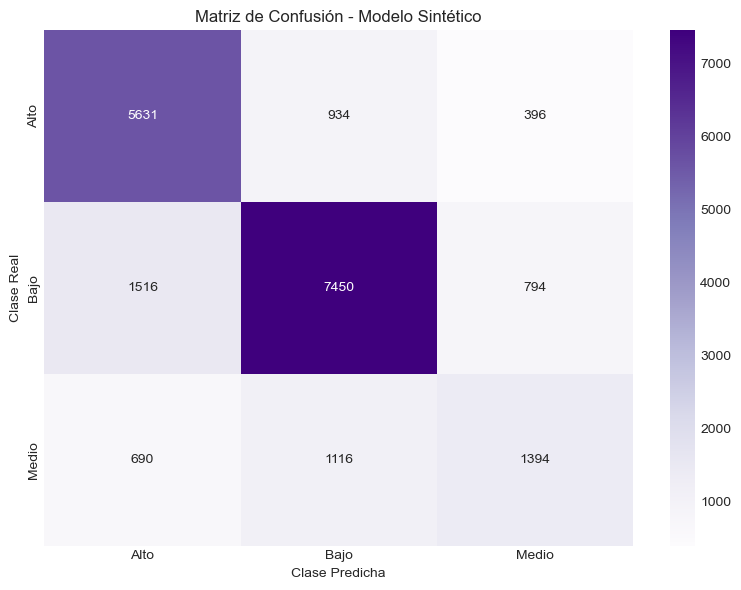

In [55]:
# Evaluar modelo sintético
y_pred_syn = modelo_sintetico.predict(X_test_syn_scaled)  # ← Usar modelo_sintetico, NO synthesizer
y_pred_syn_classes = np.argmax(y_pred_syn, axis=1)

accuracy_syn = accuracy_score(y_test_syn, y_pred_syn_classes)
precision_syn = precision_score(y_test_syn, y_pred_syn_classes, average='weighted')
recall_syn = recall_score(y_test_syn, y_pred_syn_classes, average='weighted')
f1_syn = f1_score(y_test_syn, y_pred_syn_classes, average='weighted')

print('='*60)
print('MODELO SINTÉTICO - RESULTADOS')
print('='*60)
print(f'Accuracy:  {accuracy_syn:.4f}')
print(f'Precision: {precision_syn:.4f}')
print(f'Recall:    {recall_syn:.4f}')
print(f'F1-Score:  {f1_syn:.4f}')

print('\nReporte de Clasificación:')
print(classification_report(y_test_syn, y_pred_syn_classes, target_names=le_target.classes_))

# Matriz de confusión
cm_syn = confusion_matrix(y_test_syn, y_pred_syn_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_syn, annot=True, fmt='d', cmap='Purples', 
            xticklabels=le_target.classes_, yticklabels=le_target.classes_)
plt.title('Matriz de Confusión - Modelo Sintético')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.tight_layout()
plt.show()

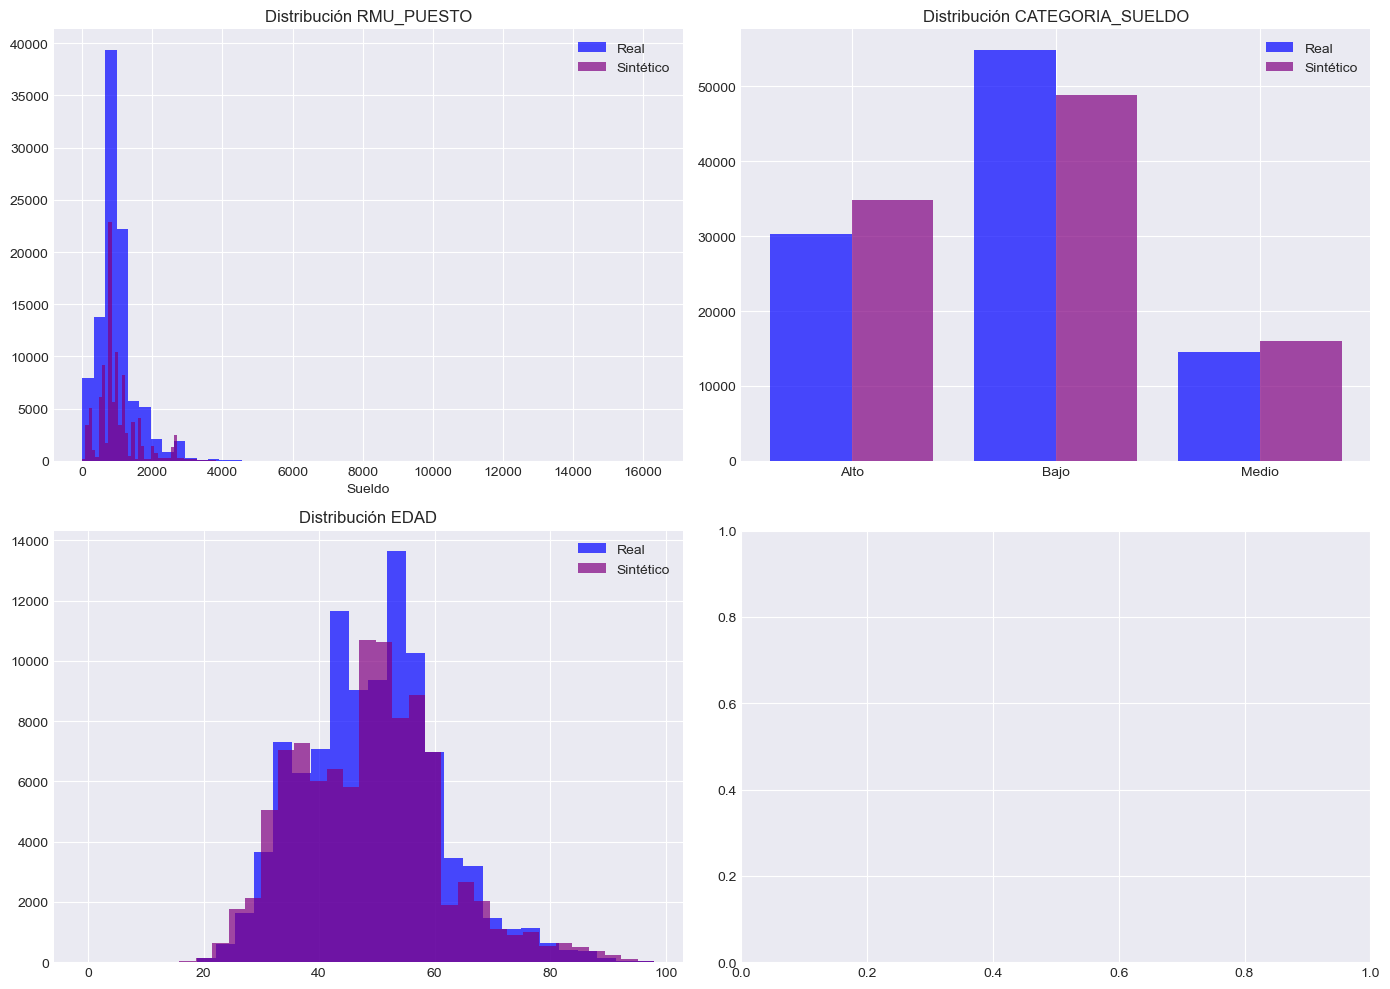

Estadísticas comparativas:

RMU_PUESTO:
  Real:      Media=$967.92, Std=$524.24
  Sintético: Media=$1020.57, Std=$611.59


In [56]:
# Comparar distribuciones real vs sintético
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# RMU_PUESTO
axes[0, 0].hist(df_original_limpio['RMU_PUESTO'], bins=50, alpha=0.7, label='Real', color='blue')
axes[0, 0].hist(df_sintetico['RMU_PUESTO'], bins=50, alpha=0.7, label='Sintético', color='purple')
axes[0, 0].set_title('Distribución RMU_PUESTO')
axes[0, 0].legend()
axes[0, 0].set_xlabel('Sueldo')

# CATEGORIA_SUELDO
real_counts = df_original_limpio['CATEGORIA_SUELDO'].value_counts().sort_index()
syn_counts = df_sintetico['CATEGORIA_SUELDO'].value_counts().sort_index()
x = np.arange(len(real_counts))
axes[0, 1].bar(x - 0.2, real_counts.values, 0.4, label='Real', color='blue', alpha=0.7)
axes[0, 1].bar(x + 0.2, syn_counts.values, 0.4, label='Sintético', color='purple', alpha=0.7)
axes[0, 1].set_title('Distribución CATEGORIA_SUELDO')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(real_counts.index)
axes[0, 1].legend()

# EDAD
if 'EDAD' in df_original_limpio.columns and 'EDAD' in df_sintetico.columns:
    axes[1, 0].hist(df_original_limpio['EDAD'], bins=30, alpha=0.7, label='Real', color='blue')
    axes[1, 0].hist(df_sintetico['EDAD'], bins=30, alpha=0.7, label='Sintético', color='purple')
    axes[1, 0].set_title('Distribución EDAD')
    axes[1, 0].legend()

# ANTIGUEDAD_DIAS
if 'ANTIGUEDAD_DIAS' in df_original_limpio.columns and 'ANTIGUEDAD_DIAS' in df_sintetico.columns:
    axes[1, 1].hist(df_original_limpio['ANTIGUEDAD_DIAS'], bins=30, alpha=0.7, label='Real', color='blue')
    axes[1, 1].hist(df_sintetico['ANTIGUEDAD_DIAS'], bins=30, alpha=0.7, label='Sintético', color='purple')
    axes[1, 1].set_title('Distribución ANTIGUEDAD_DIAS')
    axes[1, 1].legend()

plt.tight_layout()
plt.show()

print('Estadísticas comparativas:')
print(f'\nRMU_PUESTO:')
print(f'  Real:      Media=${df_original_limpio["RMU_PUESTO"].mean():.2f}, Std=${df_original_limpio["RMU_PUESTO"].std():.2f}')
print(f'  Sintético: Media=${df_sintetico["RMU_PUESTO"].mean():.2f}, Std=${df_sintetico["RMU_PUESTO"].std():.2f}')

COMPARACIÓN FINAL: ORIGINAL vs ANONIMIZADO vs SINTÉTICO
Métrica         Original        Anonimizado     Sintético      
--------------------------------------------------------------------------------
Accuracy        0.8658          0.8817          0.7266         
Precision       0.8650          0.8835          0.7219         
Recall          0.8658          0.8817          0.7266         
F1-Score        0.8641          0.8825          0.7224         


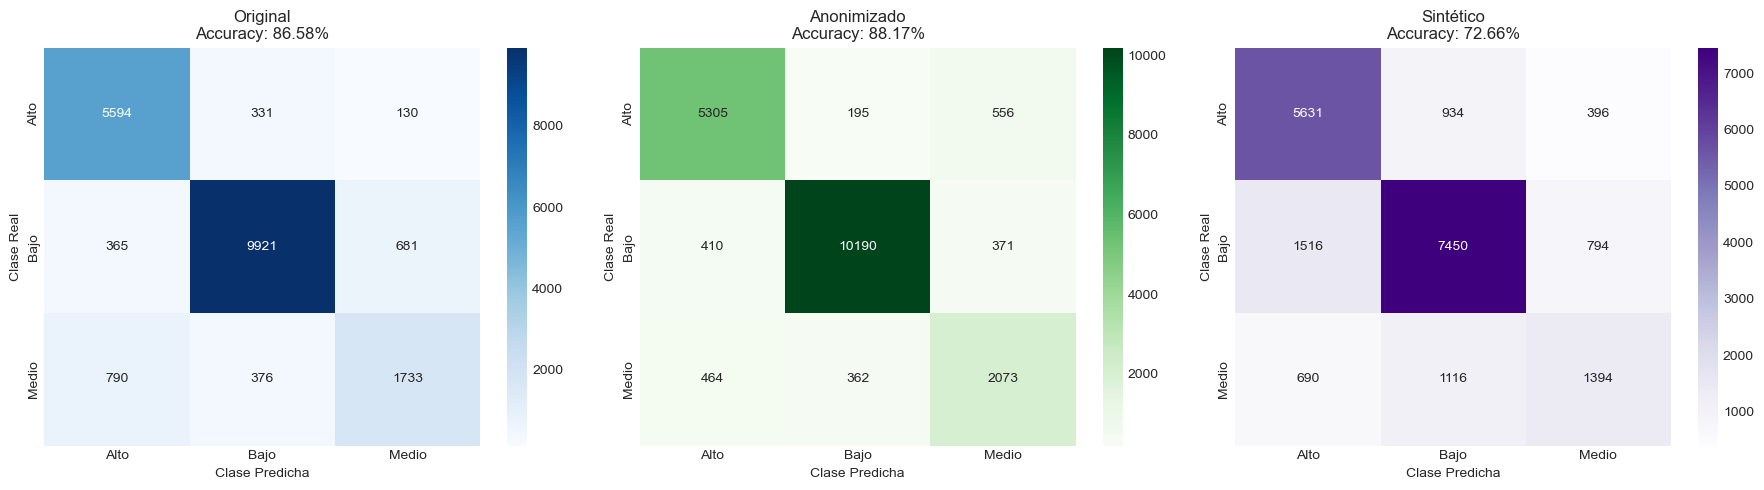

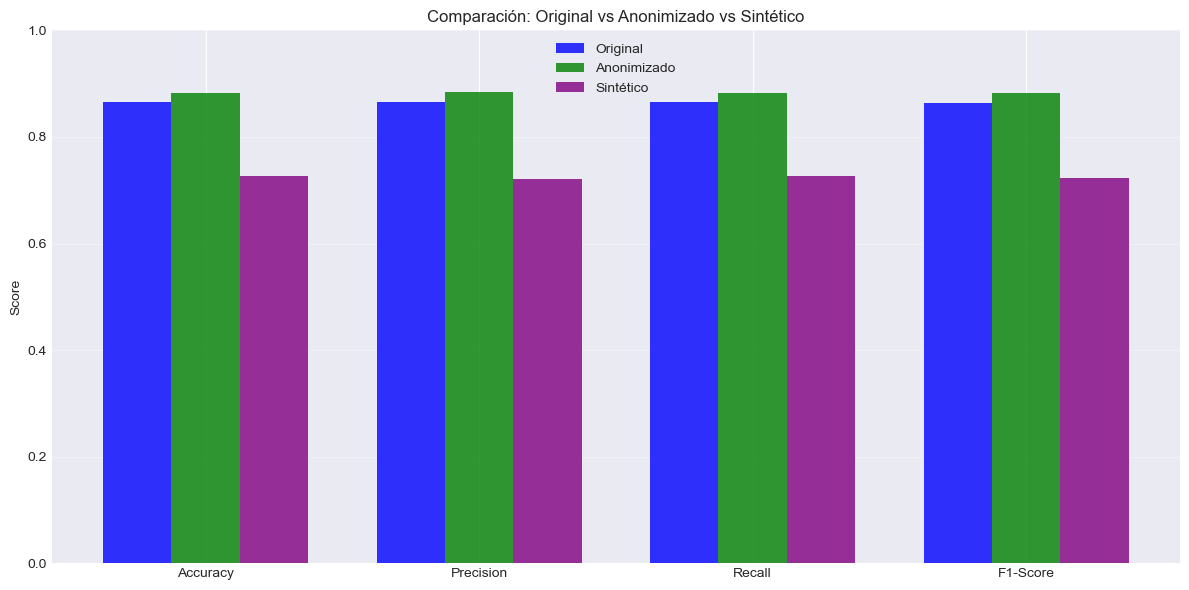

In [57]:
# Comparación completa
print('='*80)
print('COMPARACIÓN FINAL: ORIGINAL vs ANONIMIZADO vs SINTÉTICO')
print('='*80)
print(f'{"Métrica":<15} {"Original":<15} {"Anonimizado":<15} {"Sintético":<15}')
print('-'*80)
print(f'{"Accuracy":<15} {accuracy_orig:<15.4f} {accuracy_anon:<15.4f} {accuracy_syn:<15.4f}')
print(f'{"Precision":<15} {precision_orig:<15.4f} {precision_anon:<15.4f} {precision_syn:<15.4f}')
print(f'{"Recall":<15} {recall_orig:<15.4f} {recall_anon:<15.4f} {recall_syn:<15.4f}')
print(f'{"F1-Score":<15} {f1_orig:<15.4f} {f1_anon:<15.4f} {f1_syn:<15.4f}')
print('='*80)

# Visualización de las 3 matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=le_target.classes_, yticklabels=le_target.classes_)
axes[0].set_title(f'Original\nAccuracy: {accuracy_orig:.2%}')
axes[0].set_ylabel('Clase Real')
axes[0].set_xlabel('Clase Predicha')

sns.heatmap(cm_anon, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=le_target.classes_, yticklabels=le_target.classes_)
axes[1].set_title(f'Anonimizado\nAccuracy: {accuracy_anon:.2%}')
axes[1].set_ylabel('Clase Real')
axes[1].set_xlabel('Clase Predicha')

sns.heatmap(cm_syn, annot=True, fmt='d', cmap='Purples', ax=axes[2],
            xticklabels=le_target.classes_, yticklabels=le_target.classes_)
axes[2].set_title(f'Sintético\nAccuracy: {accuracy_syn:.2%}')
axes[2].set_ylabel('Clase Real')
axes[2].set_xlabel('Clase Predicha')

plt.tight_layout()
plt.show()

# Gráfico de barras
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
original_vals = [accuracy_orig, precision_orig, recall_orig, f1_orig]
anon_vals = [accuracy_anon, precision_anon, recall_anon, f1_anon]
syn_vals = [accuracy_syn, precision_syn, recall_syn, f1_syn]

x = np.arange(len(metricas))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width, original_vals, width, label='Original', color='blue', alpha=0.8)
ax.bar(x, anon_vals, width, label='Anonimizado', color='green', alpha=0.8)
ax.bar(x + width, syn_vals, width, label='Sintético', color='purple', alpha=0.8)

ax.set_ylabel('Score')
ax.set_title('Comparación: Original vs Anonimizado vs Sintético')
ax.set_xticks(x)
ax.set_xticklabels(metricas)
ax.legend()
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [58]:
# Trade-off Privacidad-Utilidad
print('='*80)
print('ANÁLISIS TRADE-OFF PRIVACIDAD vs UTILIDAD')
print('='*80)

perdida_anon = accuracy_orig - accuracy_anon
perdida_syn = accuracy_orig - accuracy_syn

print(f'\nPérdida de Accuracy respecto al Original:')
print(f'  Anonimizado: {perdida_anon:.4f} ({(perdida_anon/accuracy_orig)*100:.2f}%)')
print(f'  Sintético:   {perdida_syn:.4f} ({(perdida_syn/accuracy_orig)*100:.2f}%)')

print(f'\nNivel de Privacidad:')
print(f'  Original:     ⭐ (bajo)')
print(f'  Anonimizado:  ⭐⭐⭐ (medio-alto)')
print(f'  Sintético:    ⭐⭐⭐⭐⭐ (muy alto)')

print(f'\nConclusiones:')
if perdida_syn < 0.05:
    print(f'  ✅ Datos sintéticos EXCELENTES (<5% pérdida)')
elif perdida_syn < 0.10:
    print(f'  ✅ Datos sintéticos BUENOS (<10% pérdida)')
else:
    print(f'  ⚠️ Datos sintéticos: Pérdida significativa (>10%)')

if accuracy_syn > accuracy_anon:
    print(f'\n🎯 SINTÉTICOS SUPERIORES: +{(accuracy_syn-accuracy_anon):.4f} vs anonimización')
else:
    print(f'\n⚠️ Anonimización mejor: +{(accuracy_anon-accuracy_syn):.4f} vs sintéticos')

# Guardar todo
modelo_sintetico.save('modelo_sintetico.keras')

resultados_final = {
    'original': {'accuracy': float(accuracy_orig), 'precision': float(precision_orig), 
                 'recall': float(recall_orig), 'f1': float(f1_orig), 'privacidad': 'baja'},
    'anonimizado': {'accuracy': float(accuracy_anon), 'precision': float(precision_anon), 
                    'recall': float(recall_anon), 'f1': float(f1_anon), 'privacidad': 'media-alta'},
    'sintetico': {'accuracy': float(accuracy_syn), 'precision': float(precision_syn), 
                  'recall': float(recall_syn), 'f1': float(f1_syn), 'privacidad': 'muy alta'}
}

with open('resultados_final.json', 'w') as f:
    json.dump(resultados_final, f, indent=4)

print('\n✅ Modelos y resultados guardados')

ANÁLISIS TRADE-OFF PRIVACIDAD vs UTILIDAD

Pérdida de Accuracy respecto al Original:
  Anonimizado: -0.0158 (-1.83%)
  Sintético:   0.1392 (16.08%)

Nivel de Privacidad:
  Original:     ⭐ (bajo)
  Anonimizado:  ⭐⭐⭐ (medio-alto)
  Sintético:    ⭐⭐⭐⭐⭐ (muy alto)

Conclusiones:
  ⚠️ Datos sintéticos: Pérdida significativa (>10%)

⚠️ Anonimización mejor: +0.1550 vs sintéticos

✅ Modelos y resultados guardados
